<h1>Capstone project - Food business in Chittaong </h1>

<h2>Introuduction:</h2>

<p>Chittagong city has a population over 4 million. So there is a high demand of various types of restaurants. It is also a good opportunity for someone who want to open a food business. In this project we will try to figure out which type of restaurant and which place will be best for someone to start a successful food business.Our targetted consumer will be the  students.So we will focus on the place where students are highly densed and will find out the popular type of food business in that area.<br > <br></p>
<h2>Data:</h2>
<p>For this project we will need the following data:
    <ol>
        <li>Places of restaurants with their types</li>
        <li>Places of various educational institutions</li> 
    </ol>
<br><br>
</p>
<h2>Questoins will be answered in this project:</h2>
<ol>
    <li><h5>What type of restaurant is most popular in the city among the students?</h5></li>
    <li><h5>What kind of restaurant can be a potential for business ?</h5></li>
    <li><h5>Which area has the highest density to of educational institutions ?</h5></li>
    <li><h5>Which is the best place to start a food business?</h5></li>
</ol><br><br>  
<h2>Methodology</h2>
<p>
<ol>
    <li>We will get all the locations of educational institution in the city by using foursquare API</li>
    <li>We will use foursquare API to find the venues of all the restaurants and cafes within Chittagong City </li>
    <li>We will fix unwanted values from the data and filter it to make it usable and visualize the data</li>
    <li>Using Kmeans clustering we will find the cluster where the educational institution is mostly densed</li>
    <li>From the clusters we will locate all the food businesses and their type in the area</li>
    <li>Finally based on the type of popular food business in our chosen cluster we will answer the questions</li>
</ol>
</p>

<h2> If map is not visibile use <a href="https://nbviewer.jupyter.org/github/fuerostic/capstone_ds/blob/master/Capstone_data_science.ipynb">this link </a>  or go to "https://nbviewer.jupyter.org/github/fuerostic/capstone_ds/blob/master/Capstone_data_science.ipynb"</h2>


Lets start by importing the libraries

In [213]:
import numpy as np 

import pandas as pd 
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)

import json 

!conda install -c conda-forge geopy --yes 
from geopy.geocoders import Nominatim 

import requests 
from pandas.io.json import json_normalize 

import matplotlib.cm as cm
import matplotlib.colors as colors

from sklearn.cluster import KMeans

from bs4 import BeautifulSoup

import xml

!conda install -c conda-forge folium=0.5.0 --yes
import folium 

Solving environment: ...working... done

# All requested packages already installed.

Solving environment: ...working... done

# All requested packages already installed.



Now we will get the location of Chittagong city

In [216]:
add = 'Chittagong, Bangladesh'
geolocator = Nominatim()
location = geolocator.geocode(add)
latitude = location.latitude
longitude = location.longitude
print('The coordinate of the City of Chittagong are {}, {}.'.format(latitude, longitude))

C:\Users\Fuerostic\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: DeprecationWarning: Using Nominatim with the default "geopy/1.21.0" `user_agent` is strongly discouraged, as it violates Nominatim's ToS https://operations.osmfoundation.org/policies/nominatim/ and may possibly cause 403 and 429 HTTP errors. Please specify a custom `user_agent` with `Nominatim(user_agent="my-application")` or by overriding the default `user_agent`: `geopy.geocoders.options.default_user_agent = "my-application"`. In geopy 2.0 this will become an exception.
  


The coordinate of the City of Chittagong are 22.3307998, 91.8412863.


<h3>Getting all the data</h3>

Now we will connect with Foursquare API for getting data

In [217]:
CLIENT_ID = '3FML0TLCYPYUGJ0FT5I0VCMFIEZ0TWJVI2AP4OK0TFJJ4CFJ' # your Foursquare ID
CLIENT_SECRET = 'XUGMCCREGBAXMYE1CJ3QRAZ0QDMLDDJQMFT3RHZSSFWYQVNR' # your Foursquare Secret
VERSION = '20180604'
LIMIT = 200

Now we will get the locations of various educational institutions in the city . 
First we will get data of colleges

In [218]:
search_query = 'College'
radius = 7000
print(search_query + ' .... OK!')

College .... OK!


In [219]:
url = 'https://api.foursquare.com/v2/venues/search?client_id={}&client_secret={}&ll={},{}&v={}&query={}&radius={}&limit={}'.format(CLIENT_ID, CLIENT_SECRET, latitude, longitude, VERSION, search_query, radius, LIMIT)
url

'https://api.foursquare.com/v2/venues/search?client_id=3FML0TLCYPYUGJ0FT5I0VCMFIEZ0TWJVI2AP4OK0TFJJ4CFJ&client_secret=XUGMCCREGBAXMYE1CJ3QRAZ0QDMLDDJQMFT3RHZSSFWYQVNR&ll=22.3307998,91.8412863&v=20180604&query=College&radius=7000&limit=200'

In [220]:
results = requests.get(url).json()
results

{'meta': {'code': 200, 'requestId': '5ea596245fb726001c86c2c0'},
 'response': {'venues': [{'id': '4d3977d081258cfa062c9b5f',
    'name': 'Chittagong Medical College Boys Hostel',
    'location': {'lat': 22.35667211535404,
     'lng': 91.83079765356223,
     'labeledLatLngs': [{'label': 'display',
       'lat': 22.35667211535404,
       'lng': 91.83079765356223}],
     'distance': 3075,
     'cc': 'BD',
     'country': 'বাংলাদেশ',
     'formattedAddress': ['বাংলাদেশ']},
    'categories': [{'id': '4d954b06a243a5684965b473',
      'name': 'Residential Building (Apartment / Condo)',
      'pluralName': 'Residential Buildings (Apartments / Condos)',
      'shortName': 'Residential',
      'icon': {'prefix': 'https://ss3.4sqi.net/img/categories_v2/building/apartment_',
       'suffix': '.png'},
      'primary': True}],
    'referralId': 'v-1587910011',
    'hasPerk': False},
   {'id': '515bc883e4b045a6e11e631e',
    'name': 'Chittagong Medical College - Lower lecture gallary',
    'location'

In [221]:
venues = results['response']['venues']

In [222]:
dataframe = json_normalize(venues)
dataframe

C:\Users\Fuerostic\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: FutureWarning: pandas.io.json.json_normalize is deprecated, use pandas.json_normalize instead
  """Entry point for launching an IPython kernel.


,id,name,categories,referralId,hasPerk,location.lat,location.lng,location.labeledLatLngs,location.distance,location.cc,location.country,location.formattedAddress,location.address,location.city,location.state,location.crossStreet,location.neighborhood,location.postalCode
0,4d3977d081258cfa062c9b5f,Chittagong Medical College Boys Hostel,"[{'id': '4d954b06a243a5684965b473', 'name': 'R...",v-1587910011,False,22.356672,91.830798,"[{'label': 'display', 'lat': 22.35667211535404...",3075,BD,বাংলাদেশ,[বাংলাদেশ],NaN,NaN,NaN,NaN,NaN,NaN
1,515bc883e4b045a6e11e631e,Chittagong Medical College - Lower lecture gal...,"[{'id': '4bf58dd8d48988d1b3941735', 'name': 'M...",v-1587910011,False,22.361135,91.830655,"[{'label': 'display', 'lat': 22.36113520413447...",3549,BD,বাংলাদেশ,[বাংলাদেশ],NaN,NaN,NaN,NaN,NaN,NaN
2,54680b61498e9e5bff89864e,Chittagong Maa O Shishu Hospital Medical College,"[{'id': '4bf58dd8d48988d196941735', 'name': 'H...",v-1587910011,False,22.322726,91.806307,"[{'label': 'display', 'lat': 22.32272571735471...",3712,BD,বাংলাদেশ,"[South Agrabad, চট্টগ্রাম, বাংলাদেশ]",South Agrabad,চট্টগ্রাম,চট্টগ্রাম,NaN,NaN,NaN
3,4f5606d0e4b088020c2ca4ea,College Lab,"[{'id': '4bf58dd8d48988d1a5941735', 'name': 'C...",v-1587910011,False,22.341265,91.829796,"[{'label': 'display', 'lat': 22.34126472473145...",1660,BD,বাংলাদেশ,"[Enayed Bazar Women College, চট্টগ্রাম, বাংলাদেশ]",Enayed Bazar Women College,চট্টগ্রাম,চট্টগ্রাম,NaN,NaN,NaN
4,4ee7b4257ee5be66422344ed,Govt. City College (Chittagong),"[{'id': '4bf58dd8d48988d198941735', 'name': 'C...",v-1587910011,False,22.326284,91.833593,"[{'label': 'display', 'lat': 22.32628360485064...",938,BD,বাংলাদেশ,"[Ice Factory Road, চট্টগ্রাম, বাংলাদেশ]",Ice Factory Road,চট্টগ্রাম,চট্টগ্রাম,NaN,NaN,NaN
5,546ad752498edd9b69583ca7,Chattagram International Medical college & Hos...,"[{'id': '4bf58dd8d48988d1b3941735', 'name': 'M...",v-1587910011,False,22.383264,91.844266,"[{'label': 'display', 'lat': 22.38326392244995...",5848,BD,বাংলাদেশ,"[Chandgaon (Somsherpara), চট্টগ্রাম, বাংলাদেশ]",Chandgaon,চট্টগ্রাম,চট্টগ্রাম,Somsherpara,Bahaddarhat,NaN
6,5072adf6e4b02bfe66c2d39f,Chittagong Municipal Model School & College,"[{'id': '4bf58dd8d48988d1a8941735', 'name': 'G...",v-1587910011,False,22.335190,91.832352,"[{'label': 'display', 'lat': 22.33518981933593...",1041,BD,বাংলাদেশ,[বাংলাদেশ],NaN,NaN,NaN,NaN,NaN,NaN
7,56418dde498e9d9491ba1489,Omargani MES University College,"[{'id': '4bf58dd8d48988d198941735', 'name': 'C...",v-1587910011,False,22.360550,91.817119,"[{'label': 'display', 'lat': 22.36054950597285...",4142,BD,বাংলাদেশ,"[Zakir Hossain Rd, Chittagong, চট্টগ্রাম - 422...","Zakir Hossain Rd, Chittagong",চট্টগ্রাম,চট্টগ্রাম,NaN,Ispahani,4225
8,4f21169be4b0b5801b3a08ec,Chittagong College,"[{'id': '4bf58dd8d48988d198941735', 'name': 'C...",v-1587910011,False,22.342430,91.839346,"[{'label': 'display', 'lat': 22.34243024055997...",1310,BD,বাংলাদেশ,"[College Road, চট্টগ্রাম, বাংলাদেশ]",College Road,চট্টগ্রাম,চট্টগ্রাম,NaN,NaN,NaN
9,517ce354498eaeaa0cd17f3c,M.D.C College Square,"[{'id': '4d954b06a243a5684965b473', 'name': 'R...",v-1587910011,False,22.338402,91.850802,"[{'label': 'display', 'lat': 22.33840185281318...",1294,BD,বাংলাদেশ,"[137, Nawab Siraj-Uddowla Road, Chandanpura (1...","137, Nawab Siraj-Uddowla Road, Chandanpura",চট্টগ্রাম,চট্টগ্রাম,"137, Nawab Siraj-uddoulah Road",NaN,NaN


Dropping values that doesnt indicate institution.

In [223]:
dataframe = dataframe.drop([0,1,4,8,12,15,18,19,23,25,26,27,28,32])

In [224]:
dataframe

,id,name,categories,referralId,hasPerk,location.lat,location.lng,location.labeledLatLngs,location.distance,location.cc,location.country,location.formattedAddress,location.address,location.city,location.state,location.crossStreet,location.neighborhood,location.postalCode
2,54680b61498e9e5bff89864e,Chittagong Maa O Shishu Hospital Medical College,"[{'id': '4bf58dd8d48988d196941735', 'name': 'H...",v-1587910011,False,22.322726,91.806307,"[{'label': 'display', 'lat': 22.32272571735471...",3712,BD,বাংলাদেশ,"[South Agrabad, চট্টগ্রাম, বাংলাদেশ]",South Agrabad,চট্টগ্রাম,চট্টগ্রাম,NaN,NaN,NaN
3,4f5606d0e4b088020c2ca4ea,College Lab,"[{'id': '4bf58dd8d48988d1a5941735', 'name': 'C...",v-1587910011,False,22.341265,91.829796,"[{'label': 'display', 'lat': 22.34126472473145...",1660,BD,বাংলাদেশ,"[Enayed Bazar Women College, চট্টগ্রাম, বাংলাদেশ]",Enayed Bazar Women College,চট্টগ্রাম,চট্টগ্রাম,NaN,NaN,NaN
5,546ad752498edd9b69583ca7,Chattagram International Medical college & Hos...,"[{'id': '4bf58dd8d48988d1b3941735', 'name': 'M...",v-1587910011,False,22.383264,91.844266,"[{'label': 'display', 'lat': 22.38326392244995...",5848,BD,বাংলাদেশ,"[Chandgaon (Somsherpara), চট্টগ্রাম, বাংলাদেশ]",Chandgaon,চট্টগ্রাম,চট্টগ্রাম,Somsherpara,Bahaddarhat,NaN
6,5072adf6e4b02bfe66c2d39f,Chittagong Municipal Model School & College,"[{'id': '4bf58dd8d48988d1a8941735', 'name': 'G...",v-1587910011,False,22.335190,91.832352,"[{'label': 'display', 'lat': 22.33518981933593...",1041,BD,বাংলাদেশ,[বাংলাদেশ],NaN,NaN,NaN,NaN,NaN,NaN
7,56418dde498e9d9491ba1489,Omargani MES University College,"[{'id': '4bf58dd8d48988d198941735', 'name': 'C...",v-1587910011,False,22.360550,91.817119,"[{'label': 'display', 'lat': 22.36054950597285...",4142,BD,বাংলাদেশ,"[Zakir Hossain Rd, Chittagong, চট্টগ্রাম - 422...","Zakir Hossain Rd, Chittagong",চট্টগ্রাম,চট্টগ্রাম,NaN,Ispahani,4225
9,517ce354498eaeaa0cd17f3c,M.D.C College Square,"[{'id': '4d954b06a243a5684965b473', 'name': 'R...",v-1587910011,False,22.338402,91.850802,"[{'label': 'display', 'lat': 22.33840185281318...",1294,BD,বাংলাদেশ,"[137, Nawab Siraj-Uddowla Road, Chandanpura (1...","137, Nawab Siraj-Uddowla Road, Chandanpura",চট্টগ্রাম,চট্টগ্রাম,"137, Nawab Siraj-uddoulah Road",NaN,NaN
10,510dd78be4b0ca91f2bae9a0,Govt Hazi Mohammad Mohsin College,"[{'id': '4bf58dd8d48988d198941735', 'name': 'C...",v-1587910011,False,22.342430,91.839346,"[{'label': 'display', 'lat': 22.34243024055997...",1310,BD,বাংলাদেশ,[বাংলাদেশ],NaN,NaN,NaN,NaN,NaN,NaN
11,511748dbe4b073158cd980ee,Islamia University College,"[{'id': '4bf58dd8d48988d1af941735', 'name': 'C...",v-1587910011,False,22.321500,91.831588,"[{'label': 'display', 'lat': 22.32149968761159...",1438,BD,বাংলাদেশ,"[Darogahat Road, চট্টগ্রাম, বাংলাদেশ]",Darogahat Road,চট্টগ্রাম,চট্টগ্রাম,NaN,NaN,NaN
13,4ee7d75ca69d5ee6cd683550,Enayet Bazar Women College,"[{'id': '4bf58dd8d48988d198941735', 'name': 'C...",v-1587910011,False,22.341505,91.830009,"[{'label': 'display', 'lat': 22.34150505065918...",1663,BD,বাংলাদেশ,"[Moniruzzaman Islamabadi Road, Enayet Bazar, চ...","Moniruzzaman Islamabadi Road, Enayet Bazar",চট্টগ্রাম,চট্টগ্রাম,NaN,NaN,4000
14,50e274c5e4b0167be7ccb77f,chittagong ideal school and college,"[{'id': '4bf58dd8d48988d198941735', 'name': 'C...",v-1587910011,False,22.347979,91.833946,"[{'label': 'display', 'lat': 22.34797859191894...",2056,BD,বাংলাদেশ,[বাংলাদেশ],NaN,NaN,NaN,NaN,NaN,NaN


In [225]:
dataframe.reset_index(inplace = True)

In [226]:
dataframe

,index,id,name,categories,referralId,hasPerk,location.lat,location.lng,location.labeledLatLngs,location.distance,location.cc,location.country,location.formattedAddress,location.address,location.city,location.state,location.crossStreet,location.neighborhood,location.postalCode
0,2,54680b61498e9e5bff89864e,Chittagong Maa O Shishu Hospital Medical College,"[{'id': '4bf58dd8d48988d196941735', 'name': 'H...",v-1587910011,False,22.322726,91.806307,"[{'label': 'display', 'lat': 22.32272571735471...",3712,BD,বাংলাদেশ,"[South Agrabad, চট্টগ্রাম, বাংলাদেশ]",South Agrabad,চট্টগ্রাম,চট্টগ্রাম,NaN,NaN,NaN
1,3,4f5606d0e4b088020c2ca4ea,College Lab,"[{'id': '4bf58dd8d48988d1a5941735', 'name': 'C...",v-1587910011,False,22.341265,91.829796,"[{'label': 'display', 'lat': 22.34126472473145...",1660,BD,বাংলাদেশ,"[Enayed Bazar Women College, চট্টগ্রাম, বাংলাদেশ]",Enayed Bazar Women College,চট্টগ্রাম,চট্টগ্রাম,NaN,NaN,NaN
2,5,546ad752498edd9b69583ca7,Chattagram International Medical college & Hos...,"[{'id': '4bf58dd8d48988d1b3941735', 'name': 'M...",v-1587910011,False,22.383264,91.844266,"[{'label': 'display', 'lat': 22.38326392244995...",5848,BD,বাংলাদেশ,"[Chandgaon (Somsherpara), চট্টগ্রাম, বাংলাদেশ]",Chandgaon,চট্টগ্রাম,চট্টগ্রাম,Somsherpara,Bahaddarhat,NaN
3,6,5072adf6e4b02bfe66c2d39f,Chittagong Municipal Model School & College,"[{'id': '4bf58dd8d48988d1a8941735', 'name': 'G...",v-1587910011,False,22.335190,91.832352,"[{'label': 'display', 'lat': 22.33518981933593...",1041,BD,বাংলাদেশ,[বাংলাদেশ],NaN,NaN,NaN,NaN,NaN,NaN
4,7,56418dde498e9d9491ba1489,Omargani MES University College,"[{'id': '4bf58dd8d48988d198941735', 'name': 'C...",v-1587910011,False,22.360550,91.817119,"[{'label': 'display', 'lat': 22.36054950597285...",4142,BD,বাংলাদেশ,"[Zakir Hossain Rd, Chittagong, চট্টগ্রাম - 422...","Zakir Hossain Rd, Chittagong",চট্টগ্রাম,চট্টগ্রাম,NaN,Ispahani,4225
5,9,517ce354498eaeaa0cd17f3c,M.D.C College Square,"[{'id': '4d954b06a243a5684965b473', 'name': 'R...",v-1587910011,False,22.338402,91.850802,"[{'label': 'display', 'lat': 22.33840185281318...",1294,BD,বাংলাদেশ,"[137, Nawab Siraj-Uddowla Road, Chandanpura (1...","137, Nawab Siraj-Uddowla Road, Chandanpura",চট্টগ্রাম,চট্টগ্রাম,"137, Nawab Siraj-uddoulah Road",NaN,NaN
6,10,510dd78be4b0ca91f2bae9a0,Govt Hazi Mohammad Mohsin College,"[{'id': '4bf58dd8d48988d198941735', 'name': 'C...",v-1587910011,False,22.342430,91.839346,"[{'label': 'display', 'lat': 22.34243024055997...",1310,BD,বাংলাদেশ,[বাংলাদেশ],NaN,NaN,NaN,NaN,NaN,NaN
7,11,511748dbe4b073158cd980ee,Islamia University College,"[{'id': '4bf58dd8d48988d1af941735', 'name': 'C...",v-1587910011,False,22.321500,91.831588,"[{'label': 'display', 'lat': 22.32149968761159...",1438,BD,বাংলাদেশ,"[Darogahat Road, চট্টগ্রাম, বাংলাদেশ]",Darogahat Road,চট্টগ্রাম,চট্টগ্রাম,NaN,NaN,NaN
8,13,4ee7d75ca69d5ee6cd683550,Enayet Bazar Women College,"[{'id': '4bf58dd8d48988d198941735', 'name': 'C...",v-1587910011,False,22.341505,91.830009,"[{'label': 'display', 'lat': 22.34150505065918...",1663,BD,বাংলাদেশ,"[Moniruzzaman Islamabadi Road, Enayet Bazar, চ...","Moniruzzaman Islamabadi Road, Enayet Bazar",চট্টগ্রাম,চট্টগ্রাম,NaN,NaN,4000
9,14,50e274c5e4b0167be7ccb77f,chittagong ideal school and college,"[{'id': '4bf58dd8d48988d198941735', 'name': 'C...",v-1587910011,False,22.347979,91.833946,"[{'label': 'display', 'lat': 22.34797859191894...",2056,BD,বাংলাদেশ,[বাংলাদেশ],NaN,NaN,NaN,NaN,NaN,NaN


Now we will get datas of Universities in the city

In [227]:
search_query = 'University'
radius = 7000
print(search_query + ' .... OK!')
url = 'https://api.foursquare.com/v2/venues/search?client_id={}&client_secret={}&ll={},{}&v={}&query={}&radius={}&limit={}'.format(CLIENT_ID, CLIENT_SECRET, latitude, longitude, VERSION, search_query, radius, LIMIT)
results = requests.get(url).json()
results

University .... OK!


{'meta': {'code': 200, 'requestId': '5ea593dd29ce6a001bbf0485'},
 'response': {'venues': [{'id': '52c152e2498ea03ae1a35d47',
    'name': 'Premier University',
    'location': {'address': 'Probortok Circle',
     'lat': 22.335182189941406,
     'lng': 91.84081268310547,
     'labeledLatLngs': [{'label': 'display',
       'lat': 22.335182189941406,
       'lng': 91.84081268310547}],
     'distance': 490,
     'cc': 'BD',
     'country': 'বাংলাদেশ',
     'formattedAddress': ['Probortok Circle', 'বাংলাদেশ']},
    'categories': [{'id': '4bf58dd8d48988d1ae941735',
      'name': 'University',
      'pluralName': 'Universities',
      'shortName': 'University',
      'icon': {'prefix': 'https://ss3.4sqi.net/img/categories_v2/education/default_',
       'suffix': '.png'},
      'primary': True}],
    'referralId': 'v-1587910030',
    'hasPerk': False},
   {'id': '511748dbe4b073158cd980ee',
    'name': 'Islamia University College',
    'location': {'address': 'Darogahat Road',
     'lat': 22.321

In [228]:
venues = results['response']['venues']
dataframe2 = json_normalize(venues)
dataframe2

C:\Users\Fuerostic\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: FutureWarning: pandas.io.json.json_normalize is deprecated, use pandas.json_normalize instead
  


,id,name,categories,referralId,hasPerk,location.address,location.lat,location.lng,location.labeledLatLngs,location.distance,location.cc,location.country,location.formattedAddress,location.city,location.state,location.postalCode,location.crossStreet,location.neighborhood
0,52c152e2498ea03ae1a35d47,Premier University,"[{'id': '4bf58dd8d48988d1ae941735', 'name': 'U...",v-1587910030,False,Probortok Circle,22.335182,91.840813,"[{'label': 'display', 'lat': 22.33518218994140...",490,BD,বাংলাদেশ,"[Probortok Circle, বাংলাদেশ]",NaN,NaN,NaN,NaN,NaN
1,511748dbe4b073158cd980ee,Islamia University College,"[{'id': '4bf58dd8d48988d1af941735', 'name': 'C...",v-1587910030,False,Darogahat Road,22.321500,91.831588,"[{'label': 'display', 'lat': 22.32149968761159...",1438,BD,বাংলাদেশ,"[Darogahat Road, চট্টগ্রাম, বাংলাদেশ]",চট্টগ্রাম,চট্টগ্রাম,NaN,NaN,NaN
2,526e51af11d2978e57351a36,Chittagong Independent University,"[{'id': '4bf58dd8d48988d1ae941735', 'name': 'U...",v-1587910030,False,Jamal Khan,22.339855,91.826705,"[{'label': 'display', 'lat': 22.339855, 'lng':...",1808,BD,বাংলাদেশ,"[Jamal Khan, চট্টগ্রাম - 4000, বাংলাদেশ]",চট্টগ্রাম,চট্টগ্রাম,4000,NaN,NaN
3,50a49bc1e4b0f5b95fd1e4d5,independent university of bangladesh,"[{'id': '4bf58dd8d48988d1a3941735', 'name': 'C...",v-1587910030,False,Jamal.khan,22.347139,91.833542,"[{'label': 'display', 'lat': 22.34713935852050...",1986,BD,বাংলাদেশ,"[Jamal.khan, বাংলাদেশ]",NaN,NaN,NaN,NaN,NaN
4,522cfe737e48fb57037b8b3d,International Islamic University Chittagong,"[{'id': '4bf58dd8d48988d1ae941735', 'name': 'U...",v-1587910030,False,Chawbazar,22.355057,91.839437,"[{'label': 'display', 'lat': 22.35505699355748...",2706,BD,বাংলাদেশ,"[Chawbazar (154/A, College Road), Chittagong -...",Chittagong,Panchlaish,4203,"154/A, College Road",NaN
5,4f4b7a63e4b092e0cc192357,Premier University,"[{'id': '4bf58dd8d48988d1ae941735', 'name': 'U...",v-1587910030,False,Dampara,22.350843,91.822118,"[{'label': 'display', 'lat': 22.35084330860347...",2978,BD,বাংলাদেশ,"[Dampara, চট্টগ্রাম, বাংলাদেশ]",চট্টগ্রাম,চট্টগ্রাম,NaN,NaN,NaN
6,522abd6f11d23109584e953d,International Islamic University Chittagong,"[{'id': '4bf58dd8d48988d1ae941735', 'name': 'U...",v-1587910030,False,Chawkbazar,22.356252,91.837322,"[{'label': 'display', 'lat': 22.35625188681341...",2862,BD,বাংলাদেশ,"[Chawkbazar, চট্টগ্রাম, বাংলাদেশ]",চট্টগ্রাম,চট্টগ্রাম,NaN,NaN,NaN
7,4e0dc8c7d164fff335a4460c,Asian University for Women,[],v-1587910030,False,NaN,22.358824,91.822589,"[{'label': 'display', 'lat': 22.35882412307350...",3665,BD,বাংলাদেশ,"[চট্টগ্রাম, বাংলাদেশ]",চট্টগ্রাম,চট্টগ্রাম,NaN,NaN,NaN
8,507646c7e4b015e5466b890a,East Delta University (EDU),"[{'id': '4bf58dd8d48988d1ae941735', 'name': 'U...",v-1587910030,False,Agrabad,22.331114,91.801950,"[{'label': 'display', 'lat': 22.33111384563475...",4050,BD,বাংলাদেশ,"[Agrabad, চট্টগ্রাম - 4100, বাংলাদেশ]",চট্টগ্রাম,চট্টগ্রাম,4100,NaN,NaN
9,56418dde498e9d9491ba1489,Omargani MES University College,"[{'id': '4bf58dd8d48988d198941735', 'name': 'C...",v-1587910030,False,"Zakir Hossain Rd, Chittagong",22.360550,91.817119,"[{'label': 'display', 'lat': 22.36054950597285...",4142,BD,বাংলাদেশ,"[Zakir Hossain Rd, Chittagong, চট্টগ্রাম - 422...",চট্টগ্রাম,চট্টগ্রাম,4225,NaN,Ispahani


Dropping unwanted values

In [229]:
dataframe2 = dataframe2.drop([1,3,4,8])
dataframe2.reset_index(inplace=True)
dataframe2

,index,id,name,categories,referralId,hasPerk,location.address,location.lat,location.lng,location.labeledLatLngs,location.distance,location.cc,location.country,location.formattedAddress,location.city,location.state,location.postalCode,location.crossStreet,location.neighborhood
0,0,52c152e2498ea03ae1a35d47,Premier University,"[{'id': '4bf58dd8d48988d1ae941735', 'name': 'U...",v-1587910030,False,Probortok Circle,22.335182,91.840813,"[{'label': 'display', 'lat': 22.33518218994140...",490,BD,বাংলাদেশ,"[Probortok Circle, বাংলাদেশ]",NaN,NaN,NaN,NaN,NaN
1,2,526e51af11d2978e57351a36,Chittagong Independent University,"[{'id': '4bf58dd8d48988d1ae941735', 'name': 'U...",v-1587910030,False,Jamal Khan,22.339855,91.826705,"[{'label': 'display', 'lat': 22.339855, 'lng':...",1808,BD,বাংলাদেশ,"[Jamal Khan, চট্টগ্রাম - 4000, বাংলাদেশ]",চট্টগ্রাম,চট্টগ্রাম,4000,NaN,NaN
2,5,4f4b7a63e4b092e0cc192357,Premier University,"[{'id': '4bf58dd8d48988d1ae941735', 'name': 'U...",v-1587910030,False,Dampara,22.350843,91.822118,"[{'label': 'display', 'lat': 22.35084330860347...",2978,BD,বাংলাদেশ,"[Dampara, চট্টগ্রাম, বাংলাদেশ]",চট্টগ্রাম,চট্টগ্রাম,NaN,NaN,NaN
3,6,522abd6f11d23109584e953d,International Islamic University Chittagong,"[{'id': '4bf58dd8d48988d1ae941735', 'name': 'U...",v-1587910030,False,Chawkbazar,22.356252,91.837322,"[{'label': 'display', 'lat': 22.35625188681341...",2862,BD,বাংলাদেশ,"[Chawkbazar, চট্টগ্রাম, বাংলাদেশ]",চট্টগ্রাম,চট্টগ্রাম,NaN,NaN,NaN
4,7,4e0dc8c7d164fff335a4460c,Asian University for Women,[],v-1587910030,False,NaN,22.358824,91.822589,"[{'label': 'display', 'lat': 22.35882412307350...",3665,BD,বাংলাদেশ,"[চট্টগ্রাম, বাংলাদেশ]",চট্টগ্রাম,চট্টগ্রাম,NaN,NaN,NaN
5,9,56418dde498e9d9491ba1489,Omargani MES University College,"[{'id': '4bf58dd8d48988d198941735', 'name': 'C...",v-1587910030,False,"Zakir Hossain Rd, Chittagong",22.360550,91.817119,"[{'label': 'display', 'lat': 22.36054950597285...",4142,BD,বাংলাদেশ,"[Zakir Hossain Rd, Chittagong, চট্টগ্রাম - 422...",চট্টগ্রাম,চট্টগ্রাম,4225,NaN,Ispahani
6,10,52a8117811d2f8b16b6f3379,Chittagong Veterinary and Animal Sciences Univ...,"[{'id': '4bf58dd8d48988d1b3941735', 'name': 'M...",v-1587910030,False,NaN,22.362307,91.804436,"[{'label': 'display', 'lat': 22.36230659484863...",5166,BD,বাংলাদেশ,[বাংলাদেশ],NaN,NaN,NaN,NaN,NaN


Now get datas of schools

In [230]:
search_query = 'school'
radius = 7000
print(search_query + ' .... OK!')
url = 'https://api.foursquare.com/v2/venues/search?client_id={}&client_secret={}&ll={},{}&v={}&query={}&radius={}&limit={}'.format(CLIENT_ID, CLIENT_SECRET, latitude, longitude, VERSION, search_query, radius, LIMIT)
results = requests.get(url).json()
results

school .... OK!


{'meta': {'code': 200, 'requestId': '5ea59582542890001c347939'},
 'response': {'venues': [{'id': '5285a255498eb56ea39d2c8f',
    'name': 'Govt Muslim High School Jame Masjid',
    'location': {'lat': 22.335663226607796,
     'lng': 91.83673616903887,
     'labeledLatLngs': [{'label': 'display',
       'lat': 22.335663226607796,
       'lng': 91.83673616903887}],
     'distance': 715,
     'cc': 'BD',
     'city': 'চট্টগ্রাম',
     'state': 'চট্টগ্রাম',
     'country': 'বাংলাদেশ',
     'formattedAddress': ['চট্টগ্রাম', 'বাংলাদেশ']},
    'categories': [{'id': '4bf58dd8d48988d138941735',
      'name': 'Mosque',
      'pluralName': 'Mosques',
      'shortName': 'Mosque',
      'icon': {'prefix': 'https://ss3.4sqi.net/img/categories_v2/building/religious_mosque_',
       'suffix': '.png'},
      'primary': True}],
    'referralId': 'v-1587910041',
    'hasPerk': False},
   {'id': '50ab1596e4b0c3da5996d90a',
    'name': 'Aparnacharan Girls High School',
    'location': {'address': 'Chittagon

In [231]:
venues = results['response']['venues']
dataframe3 = json_normalize(venues)
dataframe3

C:\Users\Fuerostic\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: FutureWarning: pandas.io.json.json_normalize is deprecated, use pandas.json_normalize instead
  


,id,name,categories,referralId,hasPerk,location.lat,location.lng,location.labeledLatLngs,location.distance,location.cc,location.city,location.state,location.country,location.formattedAddress,location.address,location.crossStreet,location.postalCode
0,5285a255498eb56ea39d2c8f,Govt Muslim High School Jame Masjid,"[{'id': '4bf58dd8d48988d138941735', 'name': 'M...",v-1587910041,False,22.335663,91.836736,"[{'label': 'display', 'lat': 22.33566322660779...",715,BD,চট্টগ্রাম,চট্টগ্রাম,বাংলাদেশ,"[চট্টগ্রাম, বাংলাদেশ]",NaN,NaN,NaN
1,50ab1596e4b0c3da5996d90a,Aparnacharan Girls High School,"[{'id': '4bf58dd8d48988d1ab941735', 'name': 'S...",v-1587910041,False,22.336693,91.831848,"[{'label': 'display', 'lat': 22.33669281005859...",1172,BD,চট্টগ্রাম,চট্টগ্রাম,বাংলাদেশ,"[Chittagong (Jubilee Road), চট্টগ্রাম - 4000, ...",Chittagong,Jubilee Road,4000
2,4f54cfc8e4b03be3658be846,GEMS English Medium School,"[{'id': '4f4533814b9074f6e4fb0106', 'name': 'M...",v-1587910041,False,22.342064,91.827383,"[{'label': 'display', 'lat': 22.34206444952175...",1903,BD,চট্টগ্রাম,চট্টগ্রাম,বাংলাদেশ,"[Jubilee Road, চট্টগ্রাম, বাংলাদেশ]",Jubilee Road,NaN,NaN
3,4f539d26e4b0bf6b5e6dbf02,Red Rose Kinder Garten School,"[{'id': '4f4533814b9074f6e4fb0107', 'name': 'N...",v-1587910041,False,22.345003,91.827383,"[{'label': 'display', 'lat': 22.34500299141766...",2132,BD,চট্টগ্রাম,চট্টগ্রাম,বাংলাদেশ,"[Alpana Bhaban, Anandabag, চট্টগ্রাম, বাংলাদেশ]","Alpana Bhaban, Anandabag",NaN,NaN
4,4ee3ba7f61aff5a3411b901f,Saint Placid's High School,"[{'id': '4bf58dd8d48988d13d941735', 'name': 'H...",v-1587910041,False,22.332908,91.839003,"[{'label': 'display', 'lat': 22.33290751556591...",332,BD,চট্টগ্রাম,চট্টগ্রাম,বাংলাদেশ,"[Mirinda Lane, Patharghata, Kotwali, চট্টগ্রাম...","Mirinda Lane, Patharghata, Kotwali",NaN,4000
5,4f1abf9ae4b0e6badad71467,Chittagong Mohila Shomiti School and College (...,"[{'id': '4bf58dd8d48988d13b941735', 'name': 'S...",v-1587910041,False,22.352697,91.822051,"[{'label': 'display', 'lat': 22.35269710988521...",3140,BD,চট্টগ্রাম,চট্টগ্রাম,বাংলাদেশ,"[Dampara, Wasa, চট্টগ্রাম, বাংলাদেশ]","Dampara, Wasa",NaN,NaN
6,4d187a08bb488cfa8cf2b4d4,Municipal Model High School Market,[],v-1587910041,False,22.335341,91.832840,"[{'label': 'display', 'lat': 22.335341, 'lng':...",1005,BD,NaN,NaN,বাংলাদেশ,[বাংলাদেশ],NaN,NaN,NaN
7,5072adf6e4b02bfe66c2d39f,Chittagong Municipal Model School & College,"[{'id': '4bf58dd8d48988d1a8941735', 'name': 'G...",v-1587910041,False,22.335190,91.832352,"[{'label': 'display', 'lat': 22.33518981933593...",1041,BD,NaN,NaN,বাংলাদেশ,[বাংলাদেশ],NaN,NaN,NaN
8,512b072be4b01d58139cf2ba,Lion School,"[{'id': '4f4533804b9074f6e4fb0105', 'name': 'E...",v-1587910041,False,22.327305,91.829979,"[{'label': 'display', 'lat': 22.32730484008789...",1227,BD,চট্টগ্রাম,চট্টগ্রাম,বাংলাদেশ,"[Sadarghat, চট্টগ্রাম, বাংলাদেশ]",Sadarghat,NaN,NaN
9,4ee7b0da9a52df46f9874257,Chittagong Collegiate School,"[{'id': '4bf58dd8d48988d13d941735', 'name': 'H...",v-1587910041,False,22.335911,91.825769,"[{'label': 'display', 'lat': 22.33591123978397...",1696,BD,চট্টগ্রাম,চট্টগ্রাম,বাংলাদেশ,"[Ice Factory Road, চট্টগ্রাম, বাংলাদেশ]",Ice Factory Road,NaN,NaN


Dropping unwanted values


In [232]:
dataframe3 = dataframe3.drop([0,7,12,14,17,20])
dataframe3.reset_index(inplace =True)
dataframe3

,index,id,name,categories,referralId,hasPerk,location.lat,location.lng,location.labeledLatLngs,location.distance,location.cc,location.city,location.state,location.country,location.formattedAddress,location.address,location.crossStreet,location.postalCode
0,1,50ab1596e4b0c3da5996d90a,Aparnacharan Girls High School,"[{'id': '4bf58dd8d48988d1ab941735', 'name': 'S...",v-1587910041,False,22.336693,91.831848,"[{'label': 'display', 'lat': 22.33669281005859...",1172,BD,চট্টগ্রাম,চট্টগ্রাম,বাংলাদেশ,"[Chittagong (Jubilee Road), চট্টগ্রাম - 4000, ...",Chittagong,Jubilee Road,4000
1,2,4f54cfc8e4b03be3658be846,GEMS English Medium School,"[{'id': '4f4533814b9074f6e4fb0106', 'name': 'M...",v-1587910041,False,22.342064,91.827383,"[{'label': 'display', 'lat': 22.34206444952175...",1903,BD,চট্টগ্রাম,চট্টগ্রাম,বাংলাদেশ,"[Jubilee Road, চট্টগ্রাম, বাংলাদেশ]",Jubilee Road,NaN,NaN
2,3,4f539d26e4b0bf6b5e6dbf02,Red Rose Kinder Garten School,"[{'id': '4f4533814b9074f6e4fb0107', 'name': 'N...",v-1587910041,False,22.345003,91.827383,"[{'label': 'display', 'lat': 22.34500299141766...",2132,BD,চট্টগ্রাম,চট্টগ্রাম,বাংলাদেশ,"[Alpana Bhaban, Anandabag, চট্টগ্রাম, বাংলাদেশ]","Alpana Bhaban, Anandabag",NaN,NaN
3,4,4ee3ba7f61aff5a3411b901f,Saint Placid's High School,"[{'id': '4bf58dd8d48988d13d941735', 'name': 'H...",v-1587910041,False,22.332908,91.839003,"[{'label': 'display', 'lat': 22.33290751556591...",332,BD,চট্টগ্রাম,চট্টগ্রাম,বাংলাদেশ,"[Mirinda Lane, Patharghata, Kotwali, চট্টগ্রাম...","Mirinda Lane, Patharghata, Kotwali",NaN,4000
4,5,4f1abf9ae4b0e6badad71467,Chittagong Mohila Shomiti School and College (...,"[{'id': '4bf58dd8d48988d13b941735', 'name': 'S...",v-1587910041,False,22.352697,91.822051,"[{'label': 'display', 'lat': 22.35269710988521...",3140,BD,চট্টগ্রাম,চট্টগ্রাম,বাংলাদেশ,"[Dampara, Wasa, চট্টগ্রাম, বাংলাদেশ]","Dampara, Wasa",NaN,NaN
5,6,4d187a08bb488cfa8cf2b4d4,Municipal Model High School Market,[],v-1587910041,False,22.335341,91.832840,"[{'label': 'display', 'lat': 22.335341, 'lng':...",1005,BD,NaN,NaN,বাংলাদেশ,[বাংলাদেশ],NaN,NaN,NaN
6,8,512b072be4b01d58139cf2ba,Lion School,"[{'id': '4f4533804b9074f6e4fb0105', 'name': 'E...",v-1587910041,False,22.327305,91.829979,"[{'label': 'display', 'lat': 22.32730484008789...",1227,BD,চট্টগ্রাম,চট্টগ্রাম,বাংলাদেশ,"[Sadarghat, চট্টগ্রাম, বাংলাদেশ]",Sadarghat,NaN,NaN
7,9,4ee7b0da9a52df46f9874257,Chittagong Collegiate School,"[{'id': '4bf58dd8d48988d13d941735', 'name': 'H...",v-1587910041,False,22.335911,91.825769,"[{'label': 'display', 'lat': 22.33591123978397...",1696,BD,চট্টগ্রাম,চট্টগ্রাম,বাংলাদেশ,"[Ice Factory Road, চট্টগ্রাম, বাংলাদেশ]",Ice Factory Road,NaN,NaN
8,10,5d9a1132e8920800080048e3,Jamal Khan Kusum Kumari City Corporation Girls...,"[{'id': '4bf58dd8d48988d13d941735', 'name': 'H...",v-1587910041,False,22.346073,91.836075,"[{'label': 'display', 'lat': 22.346073, 'lng':...",1782,BD,চট্টগ্রাম,চট্টগ্রাম,বাংলাদেশ,"[চট্টগ্রাম - 4000, বাংলাদেশ]",NaN,NaN,4000
9,11,521b1dd411d2307cbc60e3cd,"Hazi Mohammod Mohsin Govt High School, Chittagong","[{'id': '4bf58dd8d48988d198941735', 'name': 'C...",v-1587910041,False,22.347659,91.838503,"[{'label': 'display', 'lat': 22.34765927724642...",1898,BD,চট্টগ্রাম,চট্টগ্রাম,বাংলাদেশ,"[College road, চট্টগ্রাম, বাংলাদেশ]",College road,NaN,NaN


Gathering all the Institution data into a single dataframe

In [233]:
edu_data = pd.concat([dataframe,dataframe2,dataframe3], axis=0)
edu_data = edu_data.drop('index',axis=1)
edu_data.reset_index(inplace=True)
edu_data =edu_data.drop('index',axis=1)
edu_data

,id,name,categories,referralId,hasPerk,location.lat,location.lng,location.labeledLatLngs,location.distance,location.cc,location.country,location.formattedAddress,location.address,location.city,location.state,location.crossStreet,location.neighborhood,location.postalCode
0,54680b61498e9e5bff89864e,Chittagong Maa O Shishu Hospital Medical College,"[{'id': '4bf58dd8d48988d196941735', 'name': 'H...",v-1587910011,False,22.322726,91.806307,"[{'label': 'display', 'lat': 22.32272571735471...",3712,BD,বাংলাদেশ,"[South Agrabad, চট্টগ্রাম, বাংলাদেশ]",South Agrabad,চট্টগ্রাম,চট্টগ্রাম,NaN,NaN,NaN
1,4f5606d0e4b088020c2ca4ea,College Lab,"[{'id': '4bf58dd8d48988d1a5941735', 'name': 'C...",v-1587910011,False,22.341265,91.829796,"[{'label': 'display', 'lat': 22.34126472473145...",1660,BD,বাংলাদেশ,"[Enayed Bazar Women College, চট্টগ্রাম, বাংলাদেশ]",Enayed Bazar Women College,চট্টগ্রাম,চট্টগ্রাম,NaN,NaN,NaN
2,546ad752498edd9b69583ca7,Chattagram International Medical college & Hos...,"[{'id': '4bf58dd8d48988d1b3941735', 'name': 'M...",v-1587910011,False,22.383264,91.844266,"[{'label': 'display', 'lat': 22.38326392244995...",5848,BD,বাংলাদেশ,"[Chandgaon (Somsherpara), চট্টগ্রাম, বাংলাদেশ]",Chandgaon,চট্টগ্রাম,চট্টগ্রাম,Somsherpara,Bahaddarhat,NaN
3,5072adf6e4b02bfe66c2d39f,Chittagong Municipal Model School & College,"[{'id': '4bf58dd8d48988d1a8941735', 'name': 'G...",v-1587910011,False,22.335190,91.832352,"[{'label': 'display', 'lat': 22.33518981933593...",1041,BD,বাংলাদেশ,[বাংলাদেশ],NaN,NaN,NaN,NaN,NaN,NaN
4,56418dde498e9d9491ba1489,Omargani MES University College,"[{'id': '4bf58dd8d48988d198941735', 'name': 'C...",v-1587910011,False,22.360550,91.817119,"[{'label': 'display', 'lat': 22.36054950597285...",4142,BD,বাংলাদেশ,"[Zakir Hossain Rd, Chittagong, চট্টগ্রাম - 422...","Zakir Hossain Rd, Chittagong",চট্টগ্রাম,চট্টগ্রাম,NaN,Ispahani,4225
5,517ce354498eaeaa0cd17f3c,M.D.C College Square,"[{'id': '4d954b06a243a5684965b473', 'name': 'R...",v-1587910011,False,22.338402,91.850802,"[{'label': 'display', 'lat': 22.33840185281318...",1294,BD,বাংলাদেশ,"[137, Nawab Siraj-Uddowla Road, Chandanpura (1...","137, Nawab Siraj-Uddowla Road, Chandanpura",চট্টগ্রাম,চট্টগ্রাম,"137, Nawab Siraj-uddoulah Road",NaN,NaN
6,510dd78be4b0ca91f2bae9a0,Govt Hazi Mohammad Mohsin College,"[{'id': '4bf58dd8d48988d198941735', 'name': 'C...",v-1587910011,False,22.342430,91.839346,"[{'label': 'display', 'lat': 22.34243024055997...",1310,BD,বাংলাদেশ,[বাংলাদেশ],NaN,NaN,NaN,NaN,NaN,NaN
7,511748dbe4b073158cd980ee,Islamia University College,"[{'id': '4bf58dd8d48988d1af941735', 'name': 'C...",v-1587910011,False,22.321500,91.831588,"[{'label': 'display', 'lat': 22.32149968761159...",1438,BD,বাংলাদেশ,"[Darogahat Road, চট্টগ্রাম, বাংলাদেশ]",Darogahat Road,চট্টগ্রাম,চট্টগ্রাম,NaN,NaN,NaN
8,4ee7d75ca69d5ee6cd683550,Enayet Bazar Women College,"[{'id': '4bf58dd8d48988d198941735', 'name': 'C...",v-1587910011,False,22.341505,91.830009,"[{'label': 'display', 'lat': 22.34150505065918...",1663,BD,বাংলাদেশ,"[Moniruzzaman Islamabadi Road, Enayet Bazar, চ...","Moniruzzaman Islamabadi Road, Enayet Bazar",চট্টগ্রাম,চট্টগ্রাম,NaN,NaN,4000
9,50e274c5e4b0167be7ccb77f,chittagong ideal school and college,"[{'id': '4bf58dd8d48988d198941735', 'name': 'C...",v-1587910011,False,22.347979,91.833946,"[{'label': 'display', 'lat': 22.34797859191894...",2056,BD,বাংলাদেশ,[বাংলাদেশ],NaN,NaN,NaN,NaN,NaN,NaN


Now, we will get the datas of restaurants

In [234]:
search_query = 'Restaurant'
radius = 7000
print(search_query + ' .... OK!')
url = 'https://api.foursquare.com/v2/venues/search?client_id={}&client_secret={}&ll={},{}&v={}&query={}&radius={}&limit={}'.format(CLIENT_ID, CLIENT_SECRET, latitude, longitude, VERSION, search_query, radius, LIMIT)
results = requests.get(url).json()
results

Restaurant .... OK!


{'meta': {'code': 200, 'requestId': '5ea594bb882fc706cb4ef7e0'},
 'response': {'venues': [{'id': '5a472e15646e381ec6d9d733',
    'name': 'Hotel ABP Restaurant & Biriyani House',
    'location': {'lat': 22.333973,
     'lng': 91.84013,
     'labeledLatLngs': [{'label': 'display',
       'lat': 22.333973,
       'lng': 91.84013}],
     'distance': 372,
     'cc': 'BD',
     'city': 'চট্টগ্রাম',
     'state': 'চট্টগ্রাম',
     'country': 'বাংলাদেশ',
     'formattedAddress': ['চট্টগ্রাম', 'বাংলাদেশ']},
    'categories': [{'id': '4bf58dd8d48988d1c4941735',
      'name': 'Restaurant',
      'pluralName': 'Restaurants',
      'shortName': 'Restaurant',
      'icon': {'prefix': 'https://ss3.4sqi.net/img/categories_v2/food/default_',
       'suffix': '.png'},
      'primary': True}],
    'referralId': 'v-1587910068',
    'hasPerk': False},
   {'id': '58fcbea0ba4a64209cad6f89',
    'name': 'LA GONDOLA RESTAURANT',
    'location': {'address': '71, Shib Bari Lane, Firingi Bazar Moor, Kotwali',
   

In [235]:
venues = results['response']['venues']
dataframe4 = json_normalize(venues)
dataframe4

C:\Users\Fuerostic\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: FutureWarning: pandas.io.json.json_normalize is deprecated, use pandas.json_normalize instead
  


,id,name,categories,referralId,hasPerk,location.lat,location.lng,location.labeledLatLngs,location.distance,location.cc,location.city,location.state,location.country,location.formattedAddress,location.address,location.crossStreet,location.postalCode
0,5a472e15646e381ec6d9d733,Hotel ABP Restaurant & Biriyani House,"[{'id': '4bf58dd8d48988d1c4941735', 'name': 'R...",v-1587910068,False,22.333973,91.840130,"[{'label': 'display', 'lat': 22.333973, 'lng':...",372,BD,চট্টগ্রাম,চট্টগ্রাম,বাংলাদেশ,"[চট্টগ্রাম, বাংলাদেশ]",NaN,NaN,NaN
1,58fcbea0ba4a64209cad6f89,LA GONDOLA RESTAURANT,"[{'id': '4bf58dd8d48988d10f941735', 'name': 'I...",v-1587910068,False,22.329506,91.836430,"[{'label': 'display', 'lat': 22.329506, 'lng':...",520,BD,চট্টগ্রাম,চট্টগ্রাম,বাংলাদেশ,"[71, Shib Bari Lane, Firingi Bazar Moor, Kotwa...","71, Shib Bari Lane, Firingi Bazar Moor, Kotwali",Firingi Bazar Moor,4000
2,506ae721e4b0e2923556bbce,"Diamond Restaurant, Biponi Bitaan","[{'id': '4bf58dd8d48988d1c7941735', 'name': 'S...",v-1587910068,False,22.334524,91.832164,"[{'label': 'display', 'lat': 22.33452448058991...",1026,BD,NaN,NaN,বাংলাদেশ,[বাংলাদেশ],NaN,NaN,NaN
3,5d9ada2a88d7280007c171ea,Shri Gobindo Vegetarian Restaurant,"[{'id': '4bf58dd8d48988d1d3941735', 'name': 'V...",v-1587910068,False,22.338545,91.836960,"[{'label': 'display', 'lat': 22.338545, 'lng':...",970,BD,চট্টগ্রাম,চট্টগ্রাম,বাংলাদেশ,"[চট্টগ্রাম - 4000, বাংলাদেশ]",NaN,NaN,4000
4,4f1c2854e4b0817d3d6d1de6,Tava Restaurant and Lounge,"[{'id': '4bf58dd8d48988d142941735', 'name': 'A...",v-1587910068,False,22.362013,91.811987,"[{'label': 'display', 'lat': 22.36201311104485...",4601,BD,NaN,NaN,বাংলাদেশ,[বাংলাদেশ],NaN,NaN,NaN
5,5c2a16b5c876c8002c928486,Green Valley Restaurant,"[{'id': '4bf58dd8d48988d145941735', 'name': 'C...",v-1587910068,False,22.335700,91.828810,"[{'label': 'display', 'lat': 22.3357, 'lng': 9...",1395,BD,চট্টগ্রাম,চট্টগ্রাম,বাংলাদেশ,"[চট্টগ্রাম - 4000, বাংলাদেশ]",NaN,NaN,4000
6,50f3a3a6e4b0ae3e5c1f2d76,Hilltop restaurant,"[{'id': '4bf58dd8d48988d16e941735', 'name': 'F...",v-1587910068,False,22.321465,91.831612,"[{'label': 'display', 'lat': 22.32146450630222...",1439,BD,চট্টগ্রাম,চট্টগ্রাম,বাংলাদেশ,"[Court Hill, চট্টগ্রাম, বাংলাদেশ]",Court Hill,NaN,NaN
7,53452658498e999a960a973d,Saffron Restaurant,"[{'id': '4bf58dd8d48988d142941735', 'name': 'A...",v-1587910068,False,22.342878,91.835239,"[{'label': 'display', 'lat': 22.342878, 'lng':...",1481,BD,NaN,NaN,বাংলাদেশ,[বাংলাদেশ],NaN,NaN,NaN
8,53a53a73498ea10c0a136d99,Green Chilli Restaurant,"[{'id': '4bf58dd8d48988d1c4941735', 'name': 'R...",v-1587910068,False,22.342036,91.830493,"[{'label': 'display', 'lat': 22.34203551525927...",1673,BD,NaN,NaN,বাংলাদেশ,[বাংলাদেশ],NaN,NaN,NaN
9,54414111498e51b65b533dde,Appayon Restaurant,"[{'id': '54135bf5e4b08f3d2429dfdf', 'name': 'I...",v-1587910068,False,22.344355,91.833571,"[{'label': 'display', 'lat': 22.34435515907094...",1705,BD,চট্টগ্রাম,চট্টগ্রাম,বাংলাদেশ,[Pacific Tower.206/217 Jamal Khan Road (Jamal ...,Pacific Tower.206/217 Jamal Khan Road,Jamal Khan Road,NaN


Getting all the data of cafes in the city

In [236]:
search_query = 'Cafe'
radius = 7000
print(search_query + ' .... OK!')
url = 'https://api.foursquare.com/v2/venues/search?client_id={}&client_secret={}&ll={},{}&v={}&query={}&radius={}&limit={}'.format(CLIENT_ID, CLIENT_SECRET, latitude, longitude, VERSION, search_query, radius, LIMIT)
results = requests.get(url).json()
results

Cafe .... OK!


{'meta': {'code': 200, 'requestId': '5ea5957214a1267c9c528896'},
 'response': {'venues': [{'id': '510faa98e4b00af1c7ace70a',
    'name': 'Cafe Ali Restaurant & Biriyani House',
    'location': {'address': 'Tayeb Bhaban, Bayazid Bostami Rd.',
     'crossStreet': 'Bayazid Bostami Rd.',
     'lat': 22.366851068199146,
     'lng': 91.82164619930101,
     'labeledLatLngs': [{'label': 'display',
       'lat': 22.366851068199146,
       'lng': 91.82164619930101}],
     'distance': 4493,
     'postalCode': '4000',
     'cc': 'BD',
     'city': 'চট্টগ্রাম',
     'state': 'চট্টগ্রাম',
     'country': 'বাংলাদেশ',
     'formattedAddress': ['Tayeb Bhaban, Bayazid Bostami Rd. (Bayazid Bostami Rd.)',
      'চট্টগ্রাম - 4000',
      'বাংলাদেশ']},
    'categories': [{'id': '4bf58dd8d48988d16d941735',
      'name': 'Café',
      'pluralName': 'Cafés',
      'shortName': 'Café',
      'icon': {'prefix': 'https://ss3.4sqi.net/img/categories_v2/food/cafe_',
       'suffix': '.png'},
      'primary': True}]

In [242]:
venues = results['response']['venues']
dataframe5 = json_normalize(venues)
dataframe5

C:\Users\Fuerostic\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: FutureWarning: pandas.io.json.json_normalize is deprecated, use pandas.json_normalize instead
  


,id,name,categories,referralId,hasPerk,location.address,location.crossStreet,location.lat,location.lng,location.labeledLatLngs,location.distance,location.postalCode,location.cc,location.city,location.state,location.country,location.formattedAddress
0,510faa98e4b00af1c7ace70a,Cafe Ali Restaurant & Biriyani House,"[{'id': '4bf58dd8d48988d16d941735', 'name': 'C...",v-1587910072,False,"Tayeb Bhaban, Bayazid Bostami Rd.",Bayazid Bostami Rd.,22.366851,91.821646,"[{'label': 'display', 'lat': 22.36685106819914...",4493,4000,BD,চট্টগ্রাম,চট্টগ্রাম,বাংলাদেশ,"[Tayeb Bhaban, Bayazid Bostami Rd. (Bayazid Bo..."
1,514bffb8e4b00b3e00e29dcf,Brost Cafe,"[{'id': '4bf58dd8d48988d16e941735', 'name': 'F...",v-1587910072,False,"Highway Plaza, Lalkhan Bazar, Ctg.",NaN,22.338400,91.850800,"[{'label': 'display', 'lat': 22.3384, 'lng': 9...",1294,NaN,BD,চট্টগ্রাম,চট্টগ্রাম,বাংলাদেশ,"[Highway Plaza, Lalkhan Bazar, Ctg., চট্টগ্রাম..."
2,5406d07f498e87b5e7634afe,Café Milano,"[{'id': '4bf58dd8d48988d16d941735', 'name': 'C...",v-1587910072,False,Premier University (Opposite of CSCR) Academic...,"O.R. Nizam Road, Probartak,Chittagong.",22.359852,91.827817,"[{'label': 'display', 'lat': 22.35985239740693...",3518,NaN,BD,চট্টগ্রাম,চট্টগ্রাম,বাংলাদেশ,[Premier University (Opposite of CSCR) Academi...
3,533c2d41498ebf53586324f4,Café Shawarma,"[{'id': '4bf58dd8d48988d16d941735', 'name': 'C...",v-1587910072,False,NaN,NaN,22.346953,91.818542,"[{'label': 'display', 'lat': 22.34695269594922...",2952,NaN,BD,NaN,NaN,বাংলাদেশ,[বাংলাদেশ]
4,53592c9d498ec14dda60c40c,Café 24 - Peninsula Hotel Chittagong,"[{'id': '4bf58dd8d48988d16d941735', 'name': 'C...",v-1587910072,False,NaN,NaN,22.357691,91.821960,"[{'label': 'display', 'lat': 22.35769070713066...",3594,NaN,BD,NaN,NaN,বাংলাদেশ,[বাংলাদেশ]
5,4ea79b0c6da12824bd512468,Cafe Piq,"[{'id': '4bf58dd8d48988d16d941735', 'name': 'C...",v-1587910072,False,NaN,NaN,22.335923,91.812435,"[{'label': 'display', 'lat': 22.33592281520600...",3025,NaN,BD,চট্টগ্রাম,চট্টগ্রাম,বাংলাদেশ,"[চট্টগ্রাম, বাংলাদেশ]"
6,4ee120b502d596de2b70802b,Cafe New D'Alam,"[{'id': '4bf58dd8d48988d1c4941735', 'name': 'R...",v-1587910072,False,"200/201, D.T. Road, Dewanhat Mor",NaN,22.338526,91.812958,"[{'label': 'display', 'lat': 22.33852574249101...",3041,NaN,BD,চট্টগ্রাম,চট্টগ্রাম,বাংলাদেশ,"[200/201, D.T. Road, Dewanhat Mor, চট্টগ্রাম, ..."
7,532c247711d2c062d4fa2e37,Cafe 88,"[{'id': '4bf58dd8d48988d16d941735', 'name': 'C...",v-1587910072,False,CDA Avenue,GEC Circle,22.358095,91.821627,"[{'label': 'display', 'lat': 22.35809535119336...",3650,4000,BD,চট্টগ্রাম,চট্টগ্রাম,বাংলাদেশ,"[CDA Avenue (GEC Circle), চট্টগ্রাম - 4000, বা..."
8,4f1a7772e4b0850c832d7151,Broast cafe,"[{'id': '4bf58dd8d48988d16d941735', 'name': 'C...",v-1587910072,False,"Highway plaza shoping center,lalkhan bazar",NaN,22.346878,91.819461,"[{'label': 'display', 'lat': 22.34687808341782...",2872,NaN,BD,চট্টগ্রাম,চট্টগ্রাম,বাংলাদেশ,"[Highway plaza shoping center,lalkhan bazar, চ..."
9,53285fd8498ea6227a81c21c,Garlic Cafe,"[{'id': '4bf58dd8d48988d142941735', 'name': 'A...",v-1587910072,False,NaN,NaN,22.351719,91.822525,"[{'label': 'display', 'lat': 22.35171890258789...",3025,NaN,BD,NaN,NaN,বাংলাদেশ,[বাংলাদেশ]


Dropping unwanted values

In [243]:
dataframe5 =dataframe5.drop([20,26,29],0)
dataframe5

,id,name,categories,referralId,hasPerk,location.address,location.crossStreet,location.lat,location.lng,location.labeledLatLngs,location.distance,location.postalCode,location.cc,location.city,location.state,location.country,location.formattedAddress
0,510faa98e4b00af1c7ace70a,Cafe Ali Restaurant & Biriyani House,"[{'id': '4bf58dd8d48988d16d941735', 'name': 'C...",v-1587910072,False,"Tayeb Bhaban, Bayazid Bostami Rd.",Bayazid Bostami Rd.,22.366851,91.821646,"[{'label': 'display', 'lat': 22.36685106819914...",4493,4000,BD,চট্টগ্রাম,চট্টগ্রাম,বাংলাদেশ,"[Tayeb Bhaban, Bayazid Bostami Rd. (Bayazid Bo..."
1,514bffb8e4b00b3e00e29dcf,Brost Cafe,"[{'id': '4bf58dd8d48988d16e941735', 'name': 'F...",v-1587910072,False,"Highway Plaza, Lalkhan Bazar, Ctg.",NaN,22.338400,91.850800,"[{'label': 'display', 'lat': 22.3384, 'lng': 9...",1294,NaN,BD,চট্টগ্রাম,চট্টগ্রাম,বাংলাদেশ,"[Highway Plaza, Lalkhan Bazar, Ctg., চট্টগ্রাম..."
2,5406d07f498e87b5e7634afe,Café Milano,"[{'id': '4bf58dd8d48988d16d941735', 'name': 'C...",v-1587910072,False,Premier University (Opposite of CSCR) Academic...,"O.R. Nizam Road, Probartak,Chittagong.",22.359852,91.827817,"[{'label': 'display', 'lat': 22.35985239740693...",3518,NaN,BD,চট্টগ্রাম,চট্টগ্রাম,বাংলাদেশ,[Premier University (Opposite of CSCR) Academi...
3,533c2d41498ebf53586324f4,Café Shawarma,"[{'id': '4bf58dd8d48988d16d941735', 'name': 'C...",v-1587910072,False,NaN,NaN,22.346953,91.818542,"[{'label': 'display', 'lat': 22.34695269594922...",2952,NaN,BD,NaN,NaN,বাংলাদেশ,[বাংলাদেশ]
4,53592c9d498ec14dda60c40c,Café 24 - Peninsula Hotel Chittagong,"[{'id': '4bf58dd8d48988d16d941735', 'name': 'C...",v-1587910072,False,NaN,NaN,22.357691,91.821960,"[{'label': 'display', 'lat': 22.35769070713066...",3594,NaN,BD,NaN,NaN,বাংলাদেশ,[বাংলাদেশ]
5,4ea79b0c6da12824bd512468,Cafe Piq,"[{'id': '4bf58dd8d48988d16d941735', 'name': 'C...",v-1587910072,False,NaN,NaN,22.335923,91.812435,"[{'label': 'display', 'lat': 22.33592281520600...",3025,NaN,BD,চট্টগ্রাম,চট্টগ্রাম,বাংলাদেশ,"[চট্টগ্রাম, বাংলাদেশ]"
6,4ee120b502d596de2b70802b,Cafe New D'Alam,"[{'id': '4bf58dd8d48988d1c4941735', 'name': 'R...",v-1587910072,False,"200/201, D.T. Road, Dewanhat Mor",NaN,22.338526,91.812958,"[{'label': 'display', 'lat': 22.33852574249101...",3041,NaN,BD,চট্টগ্রাম,চট্টগ্রাম,বাংলাদেশ,"[200/201, D.T. Road, Dewanhat Mor, চট্টগ্রাম, ..."
7,532c247711d2c062d4fa2e37,Cafe 88,"[{'id': '4bf58dd8d48988d16d941735', 'name': 'C...",v-1587910072,False,CDA Avenue,GEC Circle,22.358095,91.821627,"[{'label': 'display', 'lat': 22.35809535119336...",3650,4000,BD,চট্টগ্রাম,চট্টগ্রাম,বাংলাদেশ,"[CDA Avenue (GEC Circle), চট্টগ্রাম - 4000, বা..."
8,4f1a7772e4b0850c832d7151,Broast cafe,"[{'id': '4bf58dd8d48988d16d941735', 'name': 'C...",v-1587910072,False,"Highway plaza shoping center,lalkhan bazar",NaN,22.346878,91.819461,"[{'label': 'display', 'lat': 22.34687808341782...",2872,NaN,BD,চট্টগ্রাম,চট্টগ্রাম,বাংলাদেশ,"[Highway plaza shoping center,lalkhan bazar, চ..."
9,53285fd8498ea6227a81c21c,Garlic Cafe,"[{'id': '4bf58dd8d48988d142941735', 'name': 'A...",v-1587910072,False,NaN,NaN,22.351719,91.822525,"[{'label': 'display', 'lat': 22.35171890258789...",3025,NaN,BD,NaN,NaN,বাংলাদেশ,[বাংলাদেশ]


Making a single dataframe by combining the restaurant and cafe data

In [244]:
dataframe5['type']='Cafe'
dataframe4['type']='Restaurant'

food_data = pd.concat([dataframe4,dataframe5], axis=0)

type_col = food_data['type']

food_data

,id,name,categories,referralId,hasPerk,location.lat,location.lng,location.labeledLatLngs,location.distance,location.cc,location.city,location.state,location.country,location.formattedAddress,location.address,location.crossStreet,location.postalCode,type
0,5a472e15646e381ec6d9d733,Hotel ABP Restaurant & Biriyani House,"[{'id': '4bf58dd8d48988d1c4941735', 'name': 'R...",v-1587910068,False,22.333973,91.840130,"[{'label': 'display', 'lat': 22.333973, 'lng':...",372,BD,চট্টগ্রাম,চট্টগ্রাম,বাংলাদেশ,"[চট্টগ্রাম, বাংলাদেশ]",NaN,NaN,NaN,Restaurant
1,58fcbea0ba4a64209cad6f89,LA GONDOLA RESTAURANT,"[{'id': '4bf58dd8d48988d10f941735', 'name': 'I...",v-1587910068,False,22.329506,91.836430,"[{'label': 'display', 'lat': 22.329506, 'lng':...",520,BD,চট্টগ্রাম,চট্টগ্রাম,বাংলাদেশ,"[71, Shib Bari Lane, Firingi Bazar Moor, Kotwa...","71, Shib Bari Lane, Firingi Bazar Moor, Kotwali",Firingi Bazar Moor,4000,Restaurant
2,506ae721e4b0e2923556bbce,"Diamond Restaurant, Biponi Bitaan","[{'id': '4bf58dd8d48988d1c7941735', 'name': 'S...",v-1587910068,False,22.334524,91.832164,"[{'label': 'display', 'lat': 22.33452448058991...",1026,BD,NaN,NaN,বাংলাদেশ,[বাংলাদেশ],NaN,NaN,NaN,Restaurant
3,5d9ada2a88d7280007c171ea,Shri Gobindo Vegetarian Restaurant,"[{'id': '4bf58dd8d48988d1d3941735', 'name': 'V...",v-1587910068,False,22.338545,91.836960,"[{'label': 'display', 'lat': 22.338545, 'lng':...",970,BD,চট্টগ্রাম,চট্টগ্রাম,বাংলাদেশ,"[চট্টগ্রাম - 4000, বাংলাদেশ]",NaN,NaN,4000,Restaurant
4,4f1c2854e4b0817d3d6d1de6,Tava Restaurant and Lounge,"[{'id': '4bf58dd8d48988d142941735', 'name': 'A...",v-1587910068,False,22.362013,91.811987,"[{'label': 'display', 'lat': 22.36201311104485...",4601,BD,NaN,NaN,বাংলাদেশ,[বাংলাদেশ],NaN,NaN,NaN,Restaurant
5,5c2a16b5c876c8002c928486,Green Valley Restaurant,"[{'id': '4bf58dd8d48988d145941735', 'name': 'C...",v-1587910068,False,22.335700,91.828810,"[{'label': 'display', 'lat': 22.3357, 'lng': 9...",1395,BD,চট্টগ্রাম,চট্টগ্রাম,বাংলাদেশ,"[চট্টগ্রাম - 4000, বাংলাদেশ]",NaN,NaN,4000,Restaurant
6,50f3a3a6e4b0ae3e5c1f2d76,Hilltop restaurant,"[{'id': '4bf58dd8d48988d16e941735', 'name': 'F...",v-1587910068,False,22.321465,91.831612,"[{'label': 'display', 'lat': 22.32146450630222...",1439,BD,চট্টগ্রাম,চট্টগ্রাম,বাংলাদেশ,"[Court Hill, চট্টগ্রাম, বাংলাদেশ]",Court Hill,NaN,NaN,Restaurant
7,53452658498e999a960a973d,Saffron Restaurant,"[{'id': '4bf58dd8d48988d142941735', 'name': 'A...",v-1587910068,False,22.342878,91.835239,"[{'label': 'display', 'lat': 22.342878, 'lng':...",1481,BD,NaN,NaN,বাংলাদেশ,[বাংলাদেশ],NaN,NaN,NaN,Restaurant
8,53a53a73498ea10c0a136d99,Green Chilli Restaurant,"[{'id': '4bf58dd8d48988d1c4941735', 'name': 'R...",v-1587910068,False,22.342036,91.830493,"[{'label': 'display', 'lat': 22.34203551525927...",1673,BD,NaN,NaN,বাংলাদেশ,[বাংলাদেশ],NaN,NaN,NaN,Restaurant
9,54414111498e51b65b533dde,Appayon Restaurant,"[{'id': '54135bf5e4b08f3d2429dfdf', 'name': 'I...",v-1587910068,False,22.344355,91.833571,"[{'label': 'display', 'lat': 22.34435515907094...",1705,BD,চট্টগ্রাম,চট্টগ্রাম,বাংলাদেশ,[Pacific Tower.206/217 Jamal Khan Road (Jamal ...,Pacific Tower.206/217 Jamal Khan Road,Jamal Khan Road,NaN,Restaurant


Now we will filter the food data to make it usable

In [245]:
filtered_columns4 = ['name', 'categories'] + [col for col in food_data.columns if col.startswith('location.')] + ['id']
food_filtered = food_data.loc[:, filtered_columns4]

# function that extracts the category of the venue
def get_category_type(row):
    try:
        categories_list = row['categories']
    except:
        categories_list = row['venue.categories']
        
    if len(categories_list) == 0:
        return None
    else:
        return categories_list[0]['name']

# filter the category for each row
food_filtered['categories'] = food_filtered.apply(get_category_type, axis=1)

# clean column names by keeping only last term
food_filtered.columns = [column.split('.')[-1] for column in food_filtered.columns]
food_filtered = pd.concat([food_filtered,type_col],axis =1)
food_filtered

,name,categories,lat,lng,labeledLatLngs,distance,cc,city,state,country,formattedAddress,address,crossStreet,postalCode,id,type
0,Hotel ABP Restaurant & Biriyani House,Restaurant,22.333973,91.840130,"[{'label': 'display', 'lat': 22.333973, 'lng':...",372,BD,চট্টগ্রাম,চট্টগ্রাম,বাংলাদেশ,"[চট্টগ্রাম, বাংলাদেশ]",NaN,NaN,NaN,5a472e15646e381ec6d9d733,Restaurant
1,LA GONDOLA RESTAURANT,Indian Restaurant,22.329506,91.836430,"[{'label': 'display', 'lat': 22.329506, 'lng':...",520,BD,চট্টগ্রাম,চট্টগ্রাম,বাংলাদেশ,"[71, Shib Bari Lane, Firingi Bazar Moor, Kotwa...","71, Shib Bari Lane, Firingi Bazar Moor, Kotwali",Firingi Bazar Moor,4000,58fcbea0ba4a64209cad6f89,Restaurant
2,"Diamond Restaurant, Biponi Bitaan",Snack Place,22.334524,91.832164,"[{'label': 'display', 'lat': 22.33452448058991...",1026,BD,NaN,NaN,বাংলাদেশ,[বাংলাদেশ],NaN,NaN,NaN,506ae721e4b0e2923556bbce,Restaurant
3,Shri Gobindo Vegetarian Restaurant,Vegetarian / Vegan Restaurant,22.338545,91.836960,"[{'label': 'display', 'lat': 22.338545, 'lng':...",970,BD,চট্টগ্রাম,চট্টগ্রাম,বাংলাদেশ,"[চট্টগ্রাম - 4000, বাংলাদেশ]",NaN,NaN,4000,5d9ada2a88d7280007c171ea,Restaurant
4,Tava Restaurant and Lounge,Asian Restaurant,22.362013,91.811987,"[{'label': 'display', 'lat': 22.36201311104485...",4601,BD,NaN,NaN,বাংলাদেশ,[বাংলাদেশ],NaN,NaN,NaN,4f1c2854e4b0817d3d6d1de6,Restaurant
5,Green Valley Restaurant,Chinese Restaurant,22.335700,91.828810,"[{'label': 'display', 'lat': 22.3357, 'lng': 9...",1395,BD,চট্টগ্রাম,চট্টগ্রাম,বাংলাদেশ,"[চট্টগ্রাম - 4000, বাংলাদেশ]",NaN,NaN,4000,5c2a16b5c876c8002c928486,Restaurant
6,Hilltop restaurant,Fast Food Restaurant,22.321465,91.831612,"[{'label': 'display', 'lat': 22.32146450630222...",1439,BD,চট্টগ্রাম,চট্টগ্রাম,বাংলাদেশ,"[Court Hill, চট্টগ্রাম, বাংলাদেশ]",Court Hill,NaN,NaN,50f3a3a6e4b0ae3e5c1f2d76,Restaurant
7,Saffron Restaurant,Asian Restaurant,22.342878,91.835239,"[{'label': 'display', 'lat': 22.342878, 'lng':...",1481,BD,NaN,NaN,বাংলাদেশ,[বাংলাদেশ],NaN,NaN,NaN,53452658498e999a960a973d,Restaurant
8,Green Chilli Restaurant,Restaurant,22.342036,91.830493,"[{'label': 'display', 'lat': 22.34203551525927...",1673,BD,NaN,NaN,বাংলাদেশ,[বাংলাদেশ],NaN,NaN,NaN,53a53a73498ea10c0a136d99,Restaurant
9,Appayon Restaurant,Indian Chinese Restaurant,22.344355,91.833571,"[{'label': 'display', 'lat': 22.34435515907094...",1705,BD,চট্টগ্রাম,চট্টগ্রাম,বাংলাদেশ,[Pacific Tower.206/217 Jamal Khan Road (Jamal ...,Pacific Tower.206/217 Jamal Khan Road,Jamal Khan Road,NaN,54414111498e51b65b533dde,Restaurant


In [246]:
food_filtered.reset_index(inplace= True)


In [248]:
food_filtered = food_filtered.drop('index',axis =1)

In [249]:
food_filtered

,name,categories,lat,lng,labeledLatLngs,distance,cc,city,state,country,formattedAddress,address,crossStreet,postalCode,id,type
0,Hotel ABP Restaurant & Biriyani House,Restaurant,22.333973,91.840130,"[{'label': 'display', 'lat': 22.333973, 'lng':...",372,BD,চট্টগ্রাম,চট্টগ্রাম,বাংলাদেশ,"[চট্টগ্রাম, বাংলাদেশ]",NaN,NaN,NaN,5a472e15646e381ec6d9d733,Restaurant
1,LA GONDOLA RESTAURANT,Indian Restaurant,22.329506,91.836430,"[{'label': 'display', 'lat': 22.329506, 'lng':...",520,BD,চট্টগ্রাম,চট্টগ্রাম,বাংলাদেশ,"[71, Shib Bari Lane, Firingi Bazar Moor, Kotwa...","71, Shib Bari Lane, Firingi Bazar Moor, Kotwali",Firingi Bazar Moor,4000,58fcbea0ba4a64209cad6f89,Restaurant
2,"Diamond Restaurant, Biponi Bitaan",Snack Place,22.334524,91.832164,"[{'label': 'display', 'lat': 22.33452448058991...",1026,BD,NaN,NaN,বাংলাদেশ,[বাংলাদেশ],NaN,NaN,NaN,506ae721e4b0e2923556bbce,Restaurant
3,Shri Gobindo Vegetarian Restaurant,Vegetarian / Vegan Restaurant,22.338545,91.836960,"[{'label': 'display', 'lat': 22.338545, 'lng':...",970,BD,চট্টগ্রাম,চট্টগ্রাম,বাংলাদেশ,"[চট্টগ্রাম - 4000, বাংলাদেশ]",NaN,NaN,4000,5d9ada2a88d7280007c171ea,Restaurant
4,Tava Restaurant and Lounge,Asian Restaurant,22.362013,91.811987,"[{'label': 'display', 'lat': 22.36201311104485...",4601,BD,NaN,NaN,বাংলাদেশ,[বাংলাদেশ],NaN,NaN,NaN,4f1c2854e4b0817d3d6d1de6,Restaurant
5,Green Valley Restaurant,Chinese Restaurant,22.335700,91.828810,"[{'label': 'display', 'lat': 22.3357, 'lng': 9...",1395,BD,চট্টগ্রাম,চট্টগ্রাম,বাংলাদেশ,"[চট্টগ্রাম - 4000, বাংলাদেশ]",NaN,NaN,4000,5c2a16b5c876c8002c928486,Restaurant
6,Hilltop restaurant,Fast Food Restaurant,22.321465,91.831612,"[{'label': 'display', 'lat': 22.32146450630222...",1439,BD,চট্টগ্রাম,চট্টগ্রাম,বাংলাদেশ,"[Court Hill, চট্টগ্রাম, বাংলাদেশ]",Court Hill,NaN,NaN,50f3a3a6e4b0ae3e5c1f2d76,Restaurant
7,Saffron Restaurant,Asian Restaurant,22.342878,91.835239,"[{'label': 'display', 'lat': 22.342878, 'lng':...",1481,BD,NaN,NaN,বাংলাদেশ,[বাংলাদেশ],NaN,NaN,NaN,53452658498e999a960a973d,Restaurant
8,Green Chilli Restaurant,Restaurant,22.342036,91.830493,"[{'label': 'display', 'lat': 22.34203551525927...",1673,BD,NaN,NaN,বাংলাদেশ,[বাংলাদেশ],NaN,NaN,NaN,53a53a73498ea10c0a136d99,Restaurant
9,Appayon Restaurant,Indian Chinese Restaurant,22.344355,91.833571,"[{'label': 'display', 'lat': 22.34435515907094...",1705,BD,চট্টগ্রাম,চট্টগ্রাম,বাংলাদেশ,[Pacific Tower.206/217 Jamal Khan Road (Jamal ...,Pacific Tower.206/217 Jamal Khan Road,Jamal Khan Road,NaN,54414111498e51b65b533dde,Restaurant


Fixing values in food data

In [284]:
food_filtered.at[27,'type']='Cafe'
food_filtered.at[29,'type']='Cafe'
food_filtered

,name,categories,lat,lng,labeledLatLngs,distance,cc,city,state,country,formattedAddress,address,crossStreet,postalCode,id,type
0,Hotel ABP Restaurant & Biriyani House,Restaurant,22.333973,91.840130,"[{'label': 'display', 'lat': 22.333973, 'lng':...",372,BD,চট্টগ্রাম,চট্টগ্রাম,বাংলাদেশ,"[চট্টগ্রাম, বাংলাদেশ]",NaN,NaN,NaN,5a472e15646e381ec6d9d733,Restaurant
1,LA GONDOLA RESTAURANT,Indian Restaurant,22.329506,91.836430,"[{'label': 'display', 'lat': 22.329506, 'lng':...",520,BD,চট্টগ্রাম,চট্টগ্রাম,বাংলাদেশ,"[71, Shib Bari Lane, Firingi Bazar Moor, Kotwa...","71, Shib Bari Lane, Firingi Bazar Moor, Kotwali",Firingi Bazar Moor,4000,58fcbea0ba4a64209cad6f89,Restaurant
2,"Diamond Restaurant, Biponi Bitaan",Snack Place,22.334524,91.832164,"[{'label': 'display', 'lat': 22.33452448058991...",1026,BD,NaN,NaN,বাংলাদেশ,[বাংলাদেশ],NaN,NaN,NaN,506ae721e4b0e2923556bbce,Restaurant
3,Shri Gobindo Vegetarian Restaurant,Vegetarian / Vegan Restaurant,22.338545,91.836960,"[{'label': 'display', 'lat': 22.338545, 'lng':...",970,BD,চট্টগ্রাম,চট্টগ্রাম,বাংলাদেশ,"[চট্টগ্রাম - 4000, বাংলাদেশ]",NaN,NaN,4000,5d9ada2a88d7280007c171ea,Restaurant
4,Tava Restaurant and Lounge,Asian Restaurant,22.362013,91.811987,"[{'label': 'display', 'lat': 22.36201311104485...",4601,BD,NaN,NaN,বাংলাদেশ,[বাংলাদেশ],NaN,NaN,NaN,4f1c2854e4b0817d3d6d1de6,Restaurant
5,Green Valley Restaurant,Chinese Restaurant,22.335700,91.828810,"[{'label': 'display', 'lat': 22.3357, 'lng': 9...",1395,BD,চট্টগ্রাম,চট্টগ্রাম,বাংলাদেশ,"[চট্টগ্রাম - 4000, বাংলাদেশ]",NaN,NaN,4000,5c2a16b5c876c8002c928486,Restaurant
6,Hilltop restaurant,Fast Food Restaurant,22.321465,91.831612,"[{'label': 'display', 'lat': 22.32146450630222...",1439,BD,চট্টগ্রাম,চট্টগ্রাম,বাংলাদেশ,"[Court Hill, চট্টগ্রাম, বাংলাদেশ]",Court Hill,NaN,NaN,50f3a3a6e4b0ae3e5c1f2d76,Restaurant
7,Saffron Restaurant,Asian Restaurant,22.342878,91.835239,"[{'label': 'display', 'lat': 22.342878, 'lng':...",1481,BD,NaN,NaN,বাংলাদেশ,[বাংলাদেশ],NaN,NaN,NaN,53452658498e999a960a973d,Restaurant
8,Green Chilli Restaurant,Restaurant,22.342036,91.830493,"[{'label': 'display', 'lat': 22.34203551525927...",1673,BD,NaN,NaN,বাংলাদেশ,[বাংলাদেশ],NaN,NaN,NaN,53a53a73498ea10c0a136d99,Restaurant
9,Appayon Restaurant,Indian Chinese Restaurant,22.344355,91.833571,"[{'label': 'display', 'lat': 22.34435515907094...",1705,BD,চট্টগ্রাম,চট্টগ্রাম,বাংলাদেশ,[Pacific Tower.206/217 Jamal Khan Road (Jamal ...,Pacific Tower.206/217 Jamal Khan Road,Jamal Khan Road,NaN,54414111498e51b65b533dde,Restaurant


Filtering Education data to make it usable

In [250]:
filtered_columns = ['name', 'categories'] + [col for col in edu_data.columns if col.startswith('location.')] + ['id']
edu_filtered = edu_data.loc[:, filtered_columns]

# function that extracts the category of the venue
def get_category_type(row):
    try:
        categories_list = row['categories']
    except:
        categories_list = row['venue.categories']
        
    if len(categories_list) == 0:
        return None
    else:
        return categories_list[0]['name']

# filter the category for each row
edu_filtered['categories'] = edu_filtered.apply(get_category_type, axis=1)

# clean column names by keeping only last term
edu_filtered.columns = [column.split('.')[-1] for column in edu_filtered.columns]
edu_filtered

,name,categories,lat,lng,labeledLatLngs,distance,cc,country,formattedAddress,address,city,state,crossStreet,neighborhood,postalCode,id
0,Chittagong Maa O Shishu Hospital Medical College,Hospital,22.322726,91.806307,"[{'label': 'display', 'lat': 22.32272571735471...",3712,BD,বাংলাদেশ,"[South Agrabad, চট্টগ্রাম, বাংলাদেশ]",South Agrabad,চট্টগ্রাম,চট্টগ্রাম,NaN,NaN,NaN,54680b61498e9e5bff89864e
1,College Lab,College Lab,22.341265,91.829796,"[{'label': 'display', 'lat': 22.34126472473145...",1660,BD,বাংলাদেশ,"[Enayed Bazar Women College, চট্টগ্রাম, বাংলাদেশ]",Enayed Bazar Women College,চট্টগ্রাম,চট্টগ্রাম,NaN,NaN,NaN,4f5606d0e4b088020c2ca4ea
2,Chattagram International Medical college & Hos...,Medical School,22.383264,91.844266,"[{'label': 'display', 'lat': 22.38326392244995...",5848,BD,বাংলাদেশ,"[Chandgaon (Somsherpara), চট্টগ্রাম, বাংলাদেশ]",Chandgaon,চট্টগ্রাম,চট্টগ্রাম,Somsherpara,Bahaddarhat,NaN,546ad752498edd9b69583ca7
3,Chittagong Municipal Model School & College,General College & University,22.335190,91.832352,"[{'label': 'display', 'lat': 22.33518981933593...",1041,BD,বাংলাদেশ,[বাংলাদেশ],NaN,NaN,NaN,NaN,NaN,NaN,5072adf6e4b02bfe66c2d39f
4,Omargani MES University College,College Academic Building,22.360550,91.817119,"[{'label': 'display', 'lat': 22.36054950597285...",4142,BD,বাংলাদেশ,"[Zakir Hossain Rd, Chittagong, চট্টগ্রাম - 422...","Zakir Hossain Rd, Chittagong",চট্টগ্রাম,চট্টগ্রাম,NaN,Ispahani,4225,56418dde498e9d9491ba1489
5,M.D.C College Square,Residential Building (Apartment / Condo),22.338402,91.850802,"[{'label': 'display', 'lat': 22.33840185281318...",1294,BD,বাংলাদেশ,"[137, Nawab Siraj-Uddowla Road, Chandanpura (1...","137, Nawab Siraj-Uddowla Road, Chandanpura",চট্টগ্রাম,চট্টগ্রাম,"137, Nawab Siraj-uddoulah Road",NaN,NaN,517ce354498eaeaa0cd17f3c
6,Govt Hazi Mohammad Mohsin College,College Academic Building,22.342430,91.839346,"[{'label': 'display', 'lat': 22.34243024055997...",1310,BD,বাংলাদেশ,[বাংলাদেশ],NaN,NaN,NaN,NaN,NaN,NaN,510dd78be4b0ca91f2bae9a0
7,Islamia University College,College Auditorium,22.321500,91.831588,"[{'label': 'display', 'lat': 22.32149968761159...",1438,BD,বাংলাদেশ,"[Darogahat Road, চট্টগ্রাম, বাংলাদেশ]",Darogahat Road,চট্টগ্রাম,চট্টগ্রাম,NaN,NaN,NaN,511748dbe4b073158cd980ee
8,Enayet Bazar Women College,College Academic Building,22.341505,91.830009,"[{'label': 'display', 'lat': 22.34150505065918...",1663,BD,বাংলাদেশ,"[Moniruzzaman Islamabadi Road, Enayet Bazar, চ...","Moniruzzaman Islamabadi Road, Enayet Bazar",চট্টগ্রাম,চট্টগ্রাম,NaN,NaN,4000,4ee7d75ca69d5ee6cd683550
9,chittagong ideal school and college,College Academic Building,22.347979,91.833946,"[{'label': 'display', 'lat': 22.34797859191894...",2056,BD,বাংলাদেশ,[বাংলাদেশ],NaN,NaN,NaN,NaN,NaN,NaN,50e274c5e4b0167be7ccb77f




Visualizing all the education institution places in the city

In [251]:
edu_map = folium.Map(location=[latitude, longitude], zoom_start=13) # generate map centred around Chittagong city

for lat, lng, label in zip(edu_filtered.lat, edu_filtered.lng, edu_filtered.categories):
    folium.features.CircleMarker(
        [lat, lng],
        radius=5,
        color='blue',
        popup=label,
        fill = True,
        fill_color='blue',
        fill_opacity=0.6
    ).add_to(edu_map)

# display map
edu_map

<h3>Visualising Current data</h3>


Filtering cafe and restaurant values for individual visualising 

In [252]:
filtered_columns1 = ['name', 'categories'] + [col for col in dataframe5.columns if col.startswith('location.')] + ['id']
filtered_columns2 = ['name', 'categories'] + [col for col in dataframe4.columns if col.startswith('location.')] + ['id']


cafe_filtered = dataframe5.loc[:, filtered_columns1]
restaurants_filtered = dataframe4.loc[:, filtered_columns2]


# filter the category for each row
cafe_filtered['categories'] = cafe_filtered.apply(get_category_type, axis=1)
restaurants_filtered['categories'] = restaurants_filtered.apply(get_category_type, axis=1)

# clean column names by keeping only last term
cafe_filtered.columns = [column.split('.')[-1] for column in cafe_filtered.columns]
restaurants_filtered.columns = [column.split('.')[-1] for column in restaurants_filtered.columns]

food_map = folium.Map(location=[latitude, longitude], zoom_start=13) # generate map centred around Chittagong city

for lat, lng, label in zip(cafe_filtered.lat, cafe_filtered.lng, cafe_filtered.categories):
    folium.features.CircleMarker(
        [lat, lng],
        radius=5,
        color='brown',
        popup=label,
        fill = True,
        fill_color='brown',
        fill_opacity=0.6
    ).add_to(food_map)
    
for lat, lng, label in zip(restaurants_filtered.lat, restaurants_filtered.lng, restaurants_filtered.categories):
    folium.features.CircleMarker(
        [lat, lng],
        radius=5,
        color='orange',
        popup=label,
        fill = True,
        fill_color='orange',
        fill_opacity=0.6
    ).add_to(food_map)    

# display map
food_map

<h3>Using Kmeans clustering</h3>

Now we will use kmeans clustering to find clusters on the institutions places

In [254]:
kclusters = 7

edu_clustering = edu_filtered[['lat','lng']]

# run k-means clustering
edu_kmeans = KMeans(n_clusters=kclusters, random_state=0).fit(edu_clustering)

# check cluster labels generated for each row in the dataframe
edu_kmeans.labels_[0:10] 

array([3, 0, 2, 5, 1, 5, 5, 5, 0, 4])

In [256]:
# add clustering labels
edu_filtered.insert(16, 'Labels',edu_kmeans.labels_)

edu_filtered.head()

,name,categories,lat,lng,labeledLatLngs,distance,cc,country,formattedAddress,address,city,state,crossStreet,neighborhood,postalCode,id,Labels
0,Chittagong Maa O Shishu Hospital Medical College,Hospital,22.322726,91.806307,"[{'label': 'display', 'lat': 22.32272571735471...",3712,BD,বাংলাদেশ,"[South Agrabad, চট্টগ্রাম, বাংলাদেশ]",South Agrabad,চট্টগ্রাম,চট্টগ্রাম,NaN,NaN,NaN,54680b61498e9e5bff89864e,3
1,College Lab,College Lab,22.341265,91.829796,"[{'label': 'display', 'lat': 22.34126472473145...",1660,BD,বাংলাদেশ,"[Enayed Bazar Women College, চট্টগ্রাম, বাংলাদেশ]",Enayed Bazar Women College,চট্টগ্রাম,চট্টগ্রাম,NaN,NaN,NaN,4f5606d0e4b088020c2ca4ea,0
2,Chattagram International Medical college & Hos...,Medical School,22.383264,91.844266,"[{'label': 'display', 'lat': 22.38326392244995...",5848,BD,বাংলাদেশ,"[Chandgaon (Somsherpara), চট্টগ্রাম, বাংলাদেশ]",Chandgaon,চট্টগ্রাম,চট্টগ্রাম,Somsherpara,Bahaddarhat,NaN,546ad752498edd9b69583ca7,2
3,Chittagong Municipal Model School & College,General College & University,22.335190,91.832352,"[{'label': 'display', 'lat': 22.33518981933593...",1041,BD,বাংলাদেশ,[বাংলাদেশ],NaN,NaN,NaN,NaN,NaN,NaN,5072adf6e4b02bfe66c2d39f,5
4,Omargani MES University College,College Academic Building,22.360550,91.817119,"[{'label': 'display', 'lat': 22.36054950597285...",4142,BD,বাংলাদেশ,"[Zakir Hossain Rd, Chittagong, চট্টগ্রাম - 422...","Zakir Hossain Rd, Chittagong",চট্টগ্রাম,চট্টগ্রাম,NaN,Ispahani,4225,56418dde498e9d9491ba1489,1


Now we will visualize the clustered value

In [258]:
# create map
map_clusters = folium.Map(location=[latitude, longitude], zoom_start=11)

# set color scheme for the clusters
x = np.arange(kclusters)
ys = [i + x + (i*x)**2 for i in range(kclusters)]
colors_array = cm.rainbow(np.linspace(0, 1, len(ys)))
rainbow = [colors.rgb2hex(i) for i in colors_array]

# add markers to the map
markers_colors = []
for lat, lon, poi, cluster in zip(edu_filtered.lat, edu_filtered.lng, edu_filtered.categories,edu_filtered.Labels):
    label = folium.Popup(str(poi) + ' Cluster ' + str(cluster), parse_html=True)
    folium.CircleMarker(
        [lat, lon],
        radius=5,
        popup=label,
        color=rainbow[cluster-1],
        fill=True,
        fill_color=rainbow[cluster-1],
        fill_opacity=0.7).add_to(map_clusters)
    
map_clusters

In [259]:
edu_filtered['Labels'].value_counts()

1    13
5     9
4     9
0     7
6     2
3     2
2     1
Name: Labels, dtype: int64

We can clearly see that zone 1 has the highest density of educational institutes. We can see the cluster description below to get the place 

In [260]:
inist =edu_filtered.groupby(['Labels','address'])['name']
inist.first()

Labels  address                                   
0       Alpana Bhaban, Anandabag                                          Red Rose Kinder Garten School
        Enayed Bazar Women College                                                          College Lab
        Ice Factory Road                                                   Chittagong Collegiate School
        Jamal Khan                                                    Chittagong Independent University
        Jubilee Road                                                         GEMS English Medium School
        Moniruzzaman Islamabadi Road, Enayet Bazar                           Enayet Bazar Women College
        Port City Complex, Dewanhat                                   Dewanhat City Corporation College
1       51 Panchlaish R/A                                             Presidency Int'l School & College
        Chittagong Medical College                                           Chittagong Medical College
        Dampa

Now we can visualize the highest density place with the locations of food businesses

In [261]:
ctg_map = folium.Map(location=[latitude, longitude], zoom_start=13) # generate map centred around Chittagong city
zone = edu_filtered[edu_filtered.Labels==1]

for lat, lng, label in zip(cafe_filtered.lat, cafe_filtered.lng, cafe_filtered.categories):
    folium.features.CircleMarker(
        [lat, lng],
        radius=5,
        color='brown',
        popup=label,
        fill = True,
        fill_color='brown',
        fill_opacity=0.6
    ).add_to(ctg_map)
    
for lat, lng, label in zip(restaurants_filtered.lat, restaurants_filtered.lng, restaurants_filtered.categories):
    folium.features.CircleMarker(
        [lat, lng],
        radius=5,
        color='orange',
        popup=label,
        fill = True,
        fill_color='orange',
        fill_opacity=0.6
    ).add_to(ctg_map) 
    
    
for lat, lng, label in zip(zone.lat, zone.lng, zone.categories):
    folium.features.CircleMarker(
        [lat, lng],
        radius=5,
        color='blue',
        popup=label,
        fill = True,
        fill_color='blue',
        fill_opacity=0.6
    ).add_to(ctg_map)
    


# display map
ctg_map

<h3>Find the popular food business</h3>
Now we will find the type of food business which is popular in that area. First we will all the food business locations in our highest density zone. Then we will find out which food business is popular in there.

First figure out the mean of the location to get a circle area

In [262]:
latmean,lngmean = zone.lat.mean(),zone.lng.mean()
latmean,lngmean

(22.360067153202554, 91.82108693531563)

In [267]:
ctg_map = folium.Map(location=[latitude, longitude], zoom_start=13) # generate map centred around Chittagong city
zone = edu_filtered[edu_filtered.Labels==1]

for lat, lng, label in zip(cafe_filtered.lat, cafe_filtered.lng, cafe_filtered.categories):
    folium.features.CircleMarker(
        [lat, lng],
        radius=5,
        color='brown',
        popup=label,
        fill = True,
        fill_color='brown',
        fill_opacity=0.6
    ).add_to(ctg_map)
    
for lat, lng, label in zip(restaurants_filtered.lat, restaurants_filtered.lng, restaurants_filtered.categories):
    folium.features.CircleMarker(
        [lat, lng],
        radius=5,
        color='orange',
        popup=label,
        fill = True,
        fill_color='orange',
        fill_opacity=0.6
    ).add_to(ctg_map) 
    
    
for lat, lng, label in zip(zone.lat, zone.lng, zone.categories):
    folium.features.CircleMarker(
        [lat, lng],
        radius=5,
        color='blue',
        popup=label,
        fill = True,
        fill_color='blue',
        fill_opacity=0.6
    ).add_to(ctg_map)
    




folium.features.Circle(
    [latmean, lngmean],
    radius=1900,
    color='red',
    popup='centroid',
    fill = True,
    fill_color = 'red',
    fill_opacity = 0.4
).add_to(ctg_map)



# display map
ctg_map


In [209]:
import math
def get_distance(lt1,ln1,lt2,ln2):
    
    R = 6373.0
    
    lat1 = np.radians(lt1)
    lon1 = np.radians(ln1)
    
    lat2 = np.radians(lt2)
    lon2 = np.radians(ln2)
    
    dlon = lon2 - lon1
    dlat = lat2 - lat1
    
    a = np.sin(dlat / 2)**2 + np.cos(lat1) * np.cos(lat2) * np.sin(dlon / 2)**2
    c = 2 * np.arctan2(np.sqrt(a), np.sqrt(1 - a))
    
    distance = R * c
    
    return distance

The get_distance function will give us the distance in kilometer providing two location. We will use it to find food businesses which fall on our area

In [285]:
zonal_food_places = food_filtered[get_distance(food_filtered.lat,food_filtered.lng,latmean,lngmean)<=1.9]

In [300]:
zonal_food_places.reset_index(drop=True)

,name,categories,lat,lng,labeledLatLngs,distance,cc,city,state,country,formattedAddress,address,crossStreet,postalCode,id,type
0,Tava Restaurant and Lounge,Asian Restaurant,22.362013,91.811987,"[{'label': 'display', 'lat': 22.36201311104485...",4601,BD,NaN,NaN,বাংলাদেশ,[বাংলাদেশ],NaN,NaN,NaN,4f1c2854e4b0817d3d6d1de6,Restaurant
1,Mazetto restaurant (Radisson Blu Hotel),Italian Restaurant,22.348166,91.822903,"[{'label': 'display', 'lat': 22.348166, 'lng':...",2705,BD,NaN,NaN,বাংলাদেশ,[বাংলাদেশ],NaN,NaN,NaN,5813ebd938fa7a8fdcdeceea,Restaurant
2,Karnafuly Chinese Restaurant,Chinese Restaurant,22.351328,91.828787,"[{'label': 'display', 'lat': 22.351328, 'lng':...",2622,BD,NaN,NaN,বাংলাদেশ,[বাংলাদেশ],NaN,NaN,NaN,4c52cecd2543a593cd25e985,Restaurant
3,Pitstop Restaurant,Thai Restaurant,22.347718,91.819828,"[{'label': 'display', 'lat': 22.34771772832590...",2903,BD,NaN,NaN,বাংলাদেশ,[বাংলাদেশ],NaN,NaN,NaN,4ea5198a5c5cd12b36bf3976,Restaurant
4,Bangaliana Restaurant,Restaurant,22.347370,91.818924,"[{'label': 'display', 'lat': 22.34737, 'lng': ...",2950,BD,NaN,NaN,বাংলাদেশ,[বাংলাদেশ],NaN,NaN,NaN,5b9e7d91e4c4590039b2c45b,Restaurant
5,Syamoon Restaurant,Indian Restaurant,22.356565,91.837614,"[{'label': 'display', 'lat': 22.35656520642115...",2892,BD,NaN,NaN,বাংলাদেশ,[বাংলাদেশ],NaN,NaN,NaN,53e58cf0498ef2e63f0d2044,Restaurant
6,Mandarin Restaurant,Chinese Restaurant,22.359760,91.821640,"[{'label': 'display', 'lat': 22.35976028442383...",3805,BD,NaN,NaN,বাংলাদেশ,[বাংলাদেশ],NaN,NaN,NaN,50168f01e4b0535571cb506d,Restaurant
7,The Sky Lounge & Restaurant,Restaurant,22.358736,91.825060,"[{'label': 'display', 'lat': 22.358736, 'lng':...",3530,BD,চট্টগ্রাম,চট্টগ্রাম,বাংলাদেশ,"[চট্টগ্রাম, বাংলাদেশ]",NaN,NaN,NaN,5d4c131968f1740008e66a0e,Restaurant
8,Blossom Garden Restaurant,Asian Restaurant,22.357036,91.822118,"[{'label': 'display', 'lat': 22.357036, 'lng':...",3524,BD,NaN,NaN,বাংলাদেশ,[বাংলাদেশ],NaN,NaN,NaN,4caf5e83eb65b1f7a72d63cd,Restaurant
9,Club 21 BBQ&indian Restaurant,BBQ Joint,22.357746,91.821978,"[{'label': 'display', 'lat': 22.357746, 'lng':...",3598,BD,NaN,NaN,বাংলাদেশ,[বাংলাদেশ],NaN,NaN,NaN,529b5a1711d2e03b35029d17,Restaurant


Visualising all the businesses in that area

In [287]:
zonal_map = folium.Map(location=[latitude, longitude], zoom_start=13) # generate map centred around Chittagong city
#zone = edu_filtered[edu_filtered.Labels==1]

for lat, lng, label in zip(zonal_food_places.lat, zonal_food_places.lng, zonal_food_places.categories):
    folium.features.CircleMarker(
        [lat, lng],
        radius=5,
        color='brown',
        popup=label,
        fill = True,
        fill_color='brown',
        fill_opacity=0.6
    ).add_to(zonal_map)
    
zonal_map



We can now see which type of food business is popular in that area

In [297]:
pie_data = pd.DataFrame(zonal_food_places.type.value_counts().reset_index().values,columns=["Type","Count"])
pie_data = pie_data.sort_index(axis=0,ascending=True)
pie_data


,Type,Count
0,Cafe,25
1,Restaurant,19


This pie chart shows Cafe type food business is the most popular

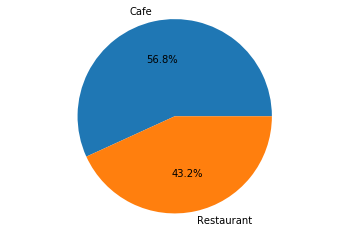

In [299]:
my_labels = pie_data.Type
plt.pie(pie_data.Count,labels=my_labels,autopct='%1.1f%%')
plt.axis('equal')
plt.show()

<h2>Conclusion</h2>

<p><h4>Now we can anwer the questions asked above in the question section.<br>From our analysis the answer of your questions are the following:</h4>
<ol>
    <li><h4>Cafe is most poplar among the students in the city</h4></li>
    <li><h4>Because of the lack of good restaurents,different types of restaurant like chinese,italian,indian can be a potential in the city</h4></li>
    <li><h4>Dampara , Zakir Hossain Rd has the most densed area with educational institutions</h4></li>
    <li><h4>O.R Nizam road is the best place to open a food business </h4></li>
</ol>
</p>